In [1]:
from bs4 import BeautifulSoup as bsoup
import urllib.robotparser
import requests
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle5 as pickle
import re
import pprint
pp = pprint.PrettyPrinter(indent=4)

## Data Collection / Web Scraping

In [2]:
# DATA COLLECTION

# First scrape daily box office info for all movies in theaters from boxofficemojo.com

# Build date for URL and make requests for each day from 2015-2019
month_and_days = {'01': [x for x in range(1,32)], '02': [x for x in range(1,29)], '03':[x for x in range(1,32)],
                  '04':[x for x in range(1,31)],'05':[x for x in range(1,32)], '06':[x for x in range(1,31)], 
                 '07':[x for x in range(1,32)], '08':[x for x in range(1,32)], '09':[x for x in range(1,31)],
                 '10': [x for x in range(1,32)], '11':[x for x in range(1,31)], '12':[x for x in range(1,32)]}

leap_years = [2008, 2016, 2020]
leap_year_month_days = {'01': [x for x in range(1,32)], '02': [x for x in range(1,30)], '03':[x for x in range(1,32)],
                  '04':[x for x in range(1,31)],'05':[x for x in range(1,32)], '06':[x for x in range(1,31)], 
                 '07':[x for x in range(1,32)], '08':[x for x in range(1,32)], '09':[x for x in range(1,31)],
                 '10': [x for x in range(1,32)], '11':[x for x in range(1,31)], '12':[x for x in range(1,32)]}

all_data = []

for year in range(2015, 2020):
    # build url for each year-month-day and scrape table data
    url = 'https://www.boxofficemojo.com/date/'
    
    if year in leap_years:
        m_d = leap_year_month_days
    else:
        m_d = month_and_days
        
    y = str(year)
    
    for month in m_d:
        m = '-' + month
        for day in m_d[month]:
            if len(str(day)) == 1:
                d = '-' + '0' + str(day)
            else:
                d = '-' + str(day)
            
            date = y + m + d
            url_curr = url + date
            
            #get data
            page = requests.get(url_curr)
            soup = bsoup(page.text, 'lxml')
            
            all_divs = soup.main.find_all("div", id="table")
            
            try:
                all_tables = all_divs[0].find_all("table")
            except:
                print(date)
            
            try:
                all_trs = all_tables[0].find_all("tr")
            except:
                print(date)
            
            for i in range(1, len(all_trs)):

                all_tds = all_trs[i].find_all("td")
                a_href = all_tds[2].find('a',href=True)
                a_href = 'http://boxofficemojo.com' + a_href['href']
                entry = []

                for j in range(0, len(all_tds)):
                    entry.append(all_tds[j].text)       
                
                entry = entry[0:11]
                entry.append(a_href)
                entry.append(date)

                # append row data to all_data list
                all_data.append(entry)
    print(f'{year} processed...')

2015 processed...
2016 processed...
2017 processed...
2018 processed...
2019 processed...


In [3]:
# Create data frame from all_data and save to pickle
column_names = ['TD', 'YD', 'Movie', 'Daily', '%YD', '%LW', 'Theaters', 'Avg', 'To_Date', 
                'Days', 'Distributor', 'href','Date']
df = pd.DataFrame(all_data, columns=column_names)
df.to_pickle('boxofficemojo-daily_gross.pkl')
df

,TD,YD,Movie,Daily,%YD,%LW,Theaters,Avg,To_Date,Days,Distributor,href,Date
0,1,1,The Hobbit: The Battle of the Five Armies,"$9,320,601",+55.3%,-29%,"3,875","$2,405","$198,869,927",16,Warner Bros.\n\n,http://boxofficemojo.com/release/rl2354677249/...,2015-01-01
1,2,3,Into the Woods,"$8,081,110",+52.7%,-46.4%,"2,507","$3,223","$72,143,214",8,Walt Disney Studios Motion Pictures\n\n,http://boxofficemojo.com/release/rl5932545/?re...,2015-01-01
2,3,2,Unbroken,"$6,953,045",+17.4%,-55%,"3,167","$2,195","$69,481,655",8,Universal Pictures\n\n,http://boxofficemojo.com/release/rl3212215809/...,2015-01-01
3,4,4,Night at the Museum: Secret of the Tomb,"$5,974,323",+22.5%,-16.4%,"3,914","$1,526","$75,328,905",14,Twentieth Century Fox\n\n,http://boxofficemojo.com/release/rl2087159297/...,2015-01-01
4,5,5,Annie,"$4,257,057",+42%,-6.8%,"3,197","$1,331","$61,208,977",14,Sony Pictures Entertainment (SPE)\n\n,http://boxofficemojo.com/release/rl641893889/?...,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95948,50,47,Hustlers,$185,-76.8%,-22.6%,3,$61,"$104,960,643",110,STX Entertainment\n\n,http://boxofficemojo.com/release/rl3255404033/...,2019-12-31
95949,51,52,Midnight Family,$134,-45.1%,-2.2%,2,$67,"$15,537",26,1091 Pictures\n\n,http://boxofficemojo.com/release/rl2601223681/...,2019-12-31
95950,52,53,Kind Hearts and Coronets2019 Re-release,$108,-53.6%,-,1,$108,"$27,523",35,Rialto Pictures\n\n,http://boxofficemojo.com/release/rl1923056129/...,2019-12-31
95951,53,50,Sympathy for the Devil,$73,-77.8%,-24%,1,$73,"$45,927",33,-,http://boxofficemojo.com/release/rl3399975425/...,2019-12-31


** Reload original box office gross pkl in here

In [5]:
# read data back in
df = pd.read_pickle('boxofficemojo-daily_gross.pkl')

In [6]:
# Make a list of unique titles
titles_unique = list(set(df['Movie']))

# Go to each movie page to scrape genre data and add to dataframe
genre_dict = {}

for m in titles_unique:
    h = list(df.loc[df['Movie'] == m, 'href'])[0]
    movie_page = requests.get(h)
    movie_soup = bsoup(movie_page.text, 'lxml')

    table_div = movie_soup.find('div', {'class': 'mojo-summary-values'})
    sub_divs = table_div.find_all('div')

    for s in sub_divs:
        if re.search('^Genres',s.text):
            genres = s.text
            genres = re.sub('Genres', '', genres)
            genres = re.sub('\s+', ' ', genres)
    genre_dict[m] = genres.split()

genre_dict

{'Pain and Glory': ['Drama'],
 'Hotel Mumbai': ['Action', 'Drama', 'History', 'Thriller'],
 'Frank and Ava': ['Biography', 'Drama', 'History'],
 'Intuitions': ['Romance', 'Thriller'],
 'Raymonda: Bolshoi Ballet': ['Music'],
 'Love, Kennedy': ['Drama'],
 'Fast Color': ['Drama', 'Sci-Fi', 'Thriller'],
 'Mary Magdalene2019 Re-release': ['Biography', 'Drama'],
 'Beta Test': ['Action', 'Sci-Fi', 'Thriller'],
 'After': ['Drama', 'Romance'],
 "Won't You Be My Neighbor?": ['Biography', 'Documentary'],
 'Foxtrot': ['Drama'],
 'Bohemian Rhapsody': ['Biography', 'Drama', 'Music'],
 'Jason Bourne': ['Action', 'Thriller'],
 'Florence Foster Jenkins': ['Biography', 'Comedy', 'Drama', 'Music'],
 'Goldbuster': ['Comedy', 'Fantasy'],
 'Wish Upon': ['Drama', 'Fantasy', 'Horror', 'Mystery', 'Thriller'],
 'The Finest Hours': ['Action', 'Drama', 'History', 'Thriller'],
 'Ratchet & Clank': ['Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Family',
  'Fantasy',
  'Sci-Fi'],
 'A Kind of Murder': ['Crime

In [8]:
# For each movie in the dictionary, unpack genres into string and add to genre column for that film
for m in genre_dict:
    genres = genre_dict[m]
    genre_str = ''
    for g in genres:
        genre_str += g + '|'
    df.loc[df['Movie'] == m,'genre'] = genre_str

df.genre.sample(5)

86901                           Drama|
5469            Drama|Sci-Fi|Thriller|
17245         Action|Adventure|Sci-Fi|
90212                    Comedy|Drama|
86412    Comedy|Fantasy|Horror|Sci-Fi|
Name: genre, dtype: object

In [9]:
# Split the genres into their own columns with True/False values
unique_genre =  df.genre.str.split('|').sum()
unique_genre = set(unique_genre)
unique_genre

for g in unique_genre:
    df[g] = df.genre.map( lambda x: g in x.split('|') )
    
df.sample(10)

,TD,YD,Movie,Daily,%YD,%LW,Theaters,Avg,To_Date,Days,...,History,Action,Musical,Adult,War,Western,Crime,Music,Comedy,Sci-Fi
59938,54,53,El Mar La Mar,$34,-15%,-,1,$34,"$6,114",44,...,False,False,False,False,False,False,False,False,False,False
63940,26,26,Ready Player One,"$17,877",-62.5%,-35.8%,201,$88,"$136,676,095",82,...,False,True,False,False,False,False,False,False,False,True
89442,20,19,The Art of Racing in the Rain,"$222,493",+72.2%,-55.3%,740,$300,"$25,101,796",30,...,False,False,False,False,False,False,False,False,True,False
80671,42,35,Climax,"$4,124",-21.2%,-64.3%,21,$196,"$790,774",33,...,False,False,False,False,False,False,False,True,False,False
94049,29,27,Judy,"$8,591",-19.1%,-54.7%,58,$148,"$23,870,947",61,...,False,False,False,False,False,False,False,False,False,False
1620,45,42,Citizenfour,"$2,016",-60.3%,-73.2%,30,$67,"$2,520,666",102,...,True,False,False,False,False,False,False,False,False,False
72850,18,17,A Private War,"$77,265",-59.7%,+142%,865,$89,"$1,145,375",18,...,False,False,False,False,True,False,False,False,False,False
58374,56,56,Bob le Flambeur,$160,+492.6%,-73.6%,1,$160,"$13,103",65,...,False,False,False,False,False,False,True,False,False,False
65047,27,28,Life of the Party,"$19,824",+32.5%,+67.3%,152,$130,"$52,558,167",61,...,False,False,False,False,False,False,False,False,True,False
43634,23,19,3 idiotas,"$13,723",-45%,-55.7%,349,$39,"$1,161,485",14,...,False,False,False,False,False,False,False,False,True,False


In [10]:
# Replace non-numeric values for numeric data columns
df['Daily'] = df['Daily'].str.replace('[^0-9]', '')
df['To_Date'] = df['To_Date'].str.replace('[^0-9]', '')
df['%YD'] = df['%YD'].str.replace('+', '')
df['%YD'] = df['%YD'].str.replace('-', '')
df['%YD'] = df['%YD'].str.replace('%', '')
df['%YD'] = df['%YD'].str.replace(',', '')
df['%YD'] = df['%YD'].str.replace('<0.1', '0')
df['%LW'] = df['%LW'].str.replace('+', '')
df['%LW'] = df['%LW'].str.replace('-', '')
df['%LW'] = df['%LW'].str.replace('%', '')
df['%LW'] = df['%LW'].str.replace(',', '')
df['%LW'] = df['%LW'].str.replace('<0.1', '0')
df['Theaters'] = df['Theaters'].str.replace('[^0-9]', '')
df['Avg'] = df['Avg'].str.replace('[^0-9]', '')
df['Days'] = df['Days'].str.replace('[^0-9]', '')
df['Distributor'] = df['Distributor'].str.replace('\\n', '')

# Update data types
df['Daily'] = pd.to_numeric(df['Daily'])
df['%YD'] = pd.to_numeric(df['%YD'])
df['%LW'] = pd.to_numeric(df['%LW'])
df['Theaters'] = pd.to_numeric(df['Theaters'])
df['Avg'] = pd.to_numeric(df['Avg'])
df['To_Date'] = pd.to_numeric(df['To_Date'])
df['Days'] = pd.to_numeric(df['Days'])
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

TD                     object
YD                     object
Movie                  object
Daily                   int64
%YD                   float64
%LW                   float64
Theaters              float64
Avg                   float64
To_Date               float64
Days                  float64
Distributor            object
href                   object
Date           datetime64[ns]
genre                  object
                         bool
Family                   bool
Horror                   bool
Adventure                bool
Biography                bool
News                     bool
Film-Noir                bool
Documentary              bool
Fantasy                  bool
Romance                  bool
Mystery                  bool
Animation                bool
Sport                    bool
Drama                    bool
Short                    bool
Thriller                 bool
History                  bool
Action                   bool
Musical                  bool
Adult     

In [11]:
df.sample(10)

,TD,YD,Movie,Daily,%YD,%LW,Theaters,Avg,To_Date,Days,...,History,Action,Musical,Adult,War,Western,Crime,Music,Comedy,Sci-Fi
89479,57,57,Bethany Hamilton: Unstoppable,140,33.3,NaN,1.0,140.0,588342.0,58.0,...,False,False,False,False,False,False,False,False,False,False
24751,10,8,Alice Through the Looking Glass,683378,23.1,57.3,495.0,1380.0,73110241.0,29.0,...,False,False,False,False,False,False,False,False,False,False
40432,48,-,Tomorrow,1009,NaN,NaN,1.0,1009.0,2489.0,35.0,...,False,False,False,False,False,False,False,False,False,False
45456,13,14,Captain Underpants: The First Epic Movie,140015,108.2,37.2,291.0,481.0,71544252.0,50.0,...,False,True,False,False,False,False,False,False,True,False
65988,18,18,Ocean's Eight,182064,31.5,63.2,518.0,351.0,137293754.0,52.0,...,False,True,False,False,False,False,True,False,True,False
60180,29,28,Baaghi 2,11529,40.4,73.7,123.0,93.0,1250952.0,14.0,...,False,True,False,False,False,False,False,False,False,False
51121,42,38,Stronger,3900,16.9,60.0,84.0,46.0,4137126.0,35.0,...,False,False,False,False,False,False,False,False,False,False
57219,40,-,A Fantastic Woman,21724,NaN,NaN,29.0,749.0,390207.0,18.0,...,False,False,False,False,False,False,False,False,False,False
23650,42,42,Paths of the Soul,220,56.6,54.9,2.0,110.0,9923.0,17.0,...,False,False,False,False,False,False,False,False,False,False
18332,41,38,The Boy and the World2015 Re-release,848,75.2,71.6,19.0,44.0,73385.0,61.0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Send data to pickle
df.to_pickle('clean-boxofficemojo-daily_gross.pkl')

In [13]:
## LABOR STATISTICS

# Scrape data from the US Bureau of Labor Statistics
# Consumer prices increase 5.0 percent for the year ended May 2021
url = "https://www.bls.gov/opub/ted/2021/consumer-prices-increase-5-0-percent-for-the-year-ended-may-2021.htm"
page = requests.get(url)
soup = bsoup(page.text, 'lxml')

In [14]:
all_tables = soup.find_all("table", class_="regular")
headers = all_tables[0].find('thead').text.strip().split("\n")
headers

all_rows = []

tbody = all_tables[0].find('tbody')
entries = tbody.find_all('tr')

for i in entries:
    x = i.text.strip().split("\n")
    x = x[0:1] + x[2:]
    all_rows.append(x)

all_dat = pd.DataFrame(all_rows, columns=headers)
all_dat['Month'] = pd.to_datetime(all_dat['Month'])
all_dat = all_dat.replace('%','', regex=True)

heads = all_dat.columns[1:]
for item in heads:
    all_dat[item] = pd.to_numeric(all_dat[item])
    
all_dat.to_pickle("final-clean-consumer_prices.pkl")
all_dat.to_csv("final-clean-consumer_prices.csv")
all_dat

,Month,All items,Food,Food at home,Food away from home,Energy,Electricity,Gasoline (all types),All items less food and energy,Furniture and bedding,Apparel,Used cars and trucks,Medical care,Sporting goods,Public transportation
0,1980-01-01,13.9,8.9,7.8,11.3,41.5,11.1,60.1,12.0,7.1,6.5,1.9,10.0,8.9,19.4
1,1980-02-01,14.2,7.3,5.9,10.7,46.6,13.8,67.9,12.0,7.6,6.4,1.0,10.8,9.6,20.3
2,1980-03-01,14.8,7.4,5.9,10.4,47.1,14.1,68.1,12.5,8.6,7.0,0.0,11.2,10.0,21.3
3,1980-04-01,14.7,7.2,5.9,10.3,43.5,14.8,59.7,13.0,8.2,7.2,-1.7,11.5,9.3,22.5
4,1980-05-01,14.4,6.8,5.6,9.8,39.3,15.8,51.7,13.3,8.5,6.8,-2.9,11.6,8.5,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2021-01-01,1.4,3.8,3.7,3.9,-3.6,1.5,-8.6,1.4,1.5,-2.5,10.0,1.9,2.8,-13.9
493,2021-02-01,1.7,3.6,3.5,3.7,2.4,2.3,1.5,1.3,0.6,-3.6,9.3,2.0,4.6,-16.2
494,2021-03-01,2.6,3.5,3.3,3.7,13.2,2.5,22.5,1.6,3.5,-2.5,9.4,1.8,4.8,-8.2
495,2021-04-01,4.2,2.4,1.2,3.8,25.1,3.6,49.6,3.0,7.8,1.9,21.0,1.5,7.0,7.0


In [15]:
# Real average weekly earnings down 2.2 percent from May 2020 to May 2021
url = "https://www.bls.gov/opub/ted/2021/real-average-weekly-earnings-down-2-2-percent-from-may-2020-to-may-2021.htm"
page = requests.get(url)
soup = bsoup(page.text, 'lxml')

In [16]:
all_tables = soup.find_all("table", class_="regular")
headers = all_tables[0].find('thead')
heads = headers.find_all('tr')
head = ["Month"] + heads[1].text.strip().split("\n")
head

all_rows = []

tbody = all_tables[0].find('tbody')
entries = tbody.find_all('tr')

for i in entries:
    x = i.text.strip().split("\n")
    x = x[0:1] + x[2:]
    all_rows.append(x)

all_dat = pd.DataFrame(all_rows, columns=head)
all_dat['Month'] = pd.to_datetime(all_dat['Month'])
all_dat = all_dat.replace('\$','', regex=True)
all_dat = all_dat.replace('%','', regex=True)

heads = all_dat.columns[1:]
for item in heads:
    all_dat[item] = pd.to_numeric(all_dat[item])
    
all_dat.to_pickle("final-clean-weekly_earnings.pkl")
all_dat.to_csv("final-clean-weekly_earnings.csv")
all_dat

,Month,Average weekly earnings of all employees,12-month percent change in average weekly earnings of all employees,"Real average weekly earnings of all employees, 1982-1984 dollars",12-month percent change in real average weekly earnings of all employees
0,2011-01-01,781.47,2.3,353.31,0.6
1,2011-02-01,784.44,3.4,353.51,1.2
2,2011-03-01,784.44,2.8,351.69,0.1
3,2011-04-01,788.45,2.8,351.84,-0.3
4,2011-05-01,788.56,2.6,350.77,-0.8
...,...,...,...,...,...
120,2021-01-01,1047.20,7.4,399.34,5.9
121,2021-02-01,1038.00,5.8,394.44,4.1
122,2021-03-01,1045.95,6.7,395.01,4.0
123,2021-04-01,1053.28,2.4,394.74,-1.7


## Merging Datasets

** Reload clean box office gross in here

In [17]:
## Merge Datasets

with open('clean-boxofficemojo-daily_gross.pkl', "rb") as fh:
  dat = pickle.load(fh)


df = dat[['Date', 'Movie', 'Daily', 'Theaters', 'Avg',
       'To_Date', 'Days', 'Distributor', 'genre', 'Music',
       'Short', 'Family', 'Horror', 'Crime', 'Documentary', 'News', 'Musical',
       'History', 'Western', 'War', 'Comedy', 'Thriller', 'Action', 'Romance',
       'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy', 'Animation',
       'Mystery', 'Adventure', 'Film-Noir', 'Adult']]
df = df.dropna()
col = df.columns.tolist()

# mutiply genre by daily to dispay total revenue per genre 
for i in range(9, len(col)):
    df[col[i]] = df[col[i]]*df['Daily']
    
# This is the main raw movie DF
df.head()

,Date,Movie,Daily,Theaters,Avg,To_Date,Days,Distributor,genre,Music,...,Biography,Sport,Sci-Fi,Drama,Fantasy,Animation,Mystery,Adventure,Film-Noir,Adult
0,2015-01-01,The Hobbit: The Battle of the Five Armies,9320601,3875.0,2405.0,198869927.0,16.0,Warner Bros.,Adventure|Fantasy|,0,...,0,0,0,0,9320601,0,0,9320601,0,0
1,2015-01-01,Into the Woods,8081110,2507.0,3223.0,72143214.0,8.0,Walt Disney Studios Motion Pictures,Adventure|Comedy|Drama|Fantasy|Musical|,0,...,0,0,0,8081110,8081110,0,0,8081110,0,0
2,2015-01-01,Unbroken,6953045,3167.0,2195.0,69481655.0,8.0,Universal Pictures,Action|Biography|Drama|Sport|War|,0,...,6953045,6953045,0,6953045,0,0,0,0,0,0
3,2015-01-01,Night at the Museum: Secret of the Tomb,5974323,3914.0,1526.0,75328905.0,14.0,Twentieth Century Fox,Adventure|Comedy|Family|Fantasy|,0,...,0,0,0,0,5974323,0,0,5974323,0,0
4,2015-01-01,Annie,4257057,3197.0,1331.0,61208977.0,14.0,Sony Pictures Entertainment (SPE),Comedy|Drama|Family|Musical|,0,...,0,0,0,4257057,0,0,0,0,0,0


In [18]:
# create month column and group movie data by month
df['Month'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))

df = df.groupby(['Month']).agg({'Music':'sum',
                             'Short':'sum',
                             'Family':'sum',
                             'Horror':'sum',
                             'Crime':'sum',
                             'Documentary':'sum',
                             'News':'sum',
                             'Musical':'sum',
                             'History':'sum',
                             'Western':'sum',
                             'War':'sum',
                             'Comedy':'sum',
                             'Thriller':'sum',
                             'Action':'sum',
                             'Romance':'sum',
                             'Biography':'sum',
                             'Sport':'sum',
                             'Sci-Fi':'sum',
                             'Drama':'sum',
                             'Fantasy':'sum',
                             'Animation':'sum',
                             'Mystery':'sum',
                             'Adventure':'sum',
                             'Film-Noir':'sum',
                             'Adult':'sum'}).round(2)
df.sample(10)

,Music,Short,Family,Horror,Crime,Documentary,News,Musical,History,Western,...,Biography,Sport,Sci-Fi,Drama,Fantasy,Animation,Mystery,Adventure,Film-Noir,Adult
Month,,,,,,,,,,,,,,,,,,,,,
2015-12,56880532,0,188736361,46152606,56902592,89566,6609,2570882,55741314,14211729,...,116718849,88530160,729706470,341896888,178153409,122168706,19872683,911708705,0,0
2018-01,49808181,0,95619439,64364629,100209292,744526,0,105077064,66824939,15050881,...,161967955,17484031,160555535,448133067,388933083,86494295,134105377,411698332,0,0
2016-04,769405,0,333256384,21896350,76546658,75922,135,496797,2999589,1325263,...,23185570,625306,183219917,411041197,277828960,72463231,85022793,496439032,0,0
2019-05,16428580,0,326663727,34780593,151514345,7072592,0,183467837,2311923,306243,...,27734135,14133045,553251783,467763527,230798609,22775863,161024623,747336431,0,0
2019-11,1139972,0,375722995,89682158,146549142,1824581,0,270144655,91629662,307484,...,154205945,79069498,65217939,431119214,401863075,300115177,65460087,418490518,0,0
2019-07,65680813,0,616209466,104504944,35018965,6622499,0,437944962,502574,0,...,18384644,782503,392752417,516109662,258342916,572824651,68421092,1002716785,0,0
2019-06,95660769,0,544666450,103404676,65552492,6231541,0,228748928,365876,0,...,78422097,562775,300167390,161065597,508588159,370144034,91627333,795494029,0,0
2015-06,44392751,217866,251297017,58912266,17427184,305391,0,0,2486271,337702,...,12129683,0,603187653,296802811,233186824,205738057,78246175,923656279,0,0
2019-01,50526078,0,221430383,49426051,50171781,9677162,0,62976782,22102626,0,...,100872222,5397100,414822448,374839715,249407637,116003201,65305966,385209034,0,0


In [19]:
# create new DF Genre that has all the info from the original df 
genre = df.reset_index()

# make month date time
genre['Month'] = pd.to_datetime(genre['Month'])

# read and display economic data
cp = pd.read_pickle('final-clean-consumer_prices.pkl')
we = pd.read_pickle('final-clean-weekly_earnings.pkl')
print(genre.columns)
print(cp.columns)
print(we.columns)
genre.dtypes

Index(['Month', 'Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult'],
      dtype='object')
Index(['Month', 'All items', 'Food', 'Food at home', 'Food away from home',
       'Energy', 'Electricity', 'Gasoline (all types)',
       'All items less food and energy', 'Furniture and bedding', 'Apparel',
       'Used cars and trucks', 'Medical care', 'Sporting goods',
       'Public transportation'],
      dtype='object')
Index(['Month', 'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees'],
      dtype='object')


Month          datetime64[ns]
Music                   int64
Short                   int64
Family                  int64
Horror                  int64
Crime                   int64
Documentary             int64
News                    int64
Musical                 int64
History                 int64
Western                 int64
War                     int64
Comedy                  int64
Thriller                int64
Action                  int64
Romance                 int64
Biography               int64
Sport                   int64
Sci-Fi                  int64
Drama                   int64
Fantasy                 int64
Animation               int64
Mystery                 int64
Adventure               int64
Film-Noir               int64
Adult                   int64
dtype: object

In [20]:
#merge all movie and economic data, save as pkl
alldat = pd.merge(genre, cp, how='left', left_on='Month', right_on='Month')
alldat = pd.merge(alldat, we, how='left', left_on='Month', right_on='Month')

alldat.to_pickle('alldat.pkl')

** RELOAD FULL DATASET HERE

In [21]:
# reload the alldat pickle and store in df
# with open('alldat.pkl', "rb") as fh:
#   df = pickle.load(fh)

df = pd.read_pickle('alldat.pkl')

df

,Month,Music,Short,Family,Horror,Crime,Documentary,News,Musical,History,...,Furniture and bedding,Apparel,Used cars and trucks,Medical care,Sporting goods,Public transportation,Average weekly earnings of all employees,12-month percent change in average weekly earnings of all employees,"Real average weekly earnings of all employees, 1982-1984 dollars",12-month percent change in real average weekly earnings of all employees
0,2015-01-01,100133,184421,147664166,26149007,128172568,1427351,0,99391382,46149865,...,-2.2,-1.4,-4.0,2.6,-1.9,-1.8,853.19,2.4,363.45,2.7
1,2015-02-01,1159,225958,165612393,8478090,23401110,443213,0,6757431,7938838,...,-1.5,-0.8,-2.9,2.3,-1.9,-1.9,857.39,2.8,364.32,2.9
2,2015-03-01,417215,319151,244943697,22254918,143521226,595856,0,251500,1734157,...,-0.7,-0.5,-1.3,2.5,-2.2,-3.3,856.98,2.2,363.16,2.2
3,2015-04-01,4750771,261289,181627844,36005673,103680241,11874095,0,18568,33521281,...,0.0,-0.8,-0.5,2.9,-2.2,-4.7,858.71,2.3,363.52,2.4
4,2015-05-01,148313224,283589,110568094,45282366,59902335,4855223,0,804,14530889,...,-0.8,-1.5,-0.5,2.8,-2.0,-4.1,861.12,2.3,363.34,2.3
5,2015-06-01,44392751,217866,251297017,58912266,17427184,305391,0,0,2486271,...,-1.0,-1.8,-0.7,2.5,-2.2,-3.2,861.81,2.2,362.63,2.0
6,2015-07-01,72051633,211639,433218665,25313337,310374873,3042611,0,0,912307,...,-0.4,-1.6,-1.1,2.5,-0.9,-3.1,862.85,2.2,362.49,1.9
7,2015-08-01,162876889,184973,91882081,20310243,86003941,382722,0,0,135540579,...,-0.9,-0.9,-1.5,2.5,-0.9,-2.9,865.95,1.9,363.79,1.7
8,2015-09-01,29943790,34958,85844974,122913338,69229119,534570,0,0,29316963,...,0.2,-1.4,-1.7,2.5,-1.2,-2.9,866.30,2.2,364.76,2.2
9,2015-10-01,4873446,0,186594472,207490530,56673423,2549757,0,0,55446518,...,-0.5,-1.9,-1.4,3.0,-1.7,-2.3,871.92,2.5,366.76,2.4


## Visualizing the data

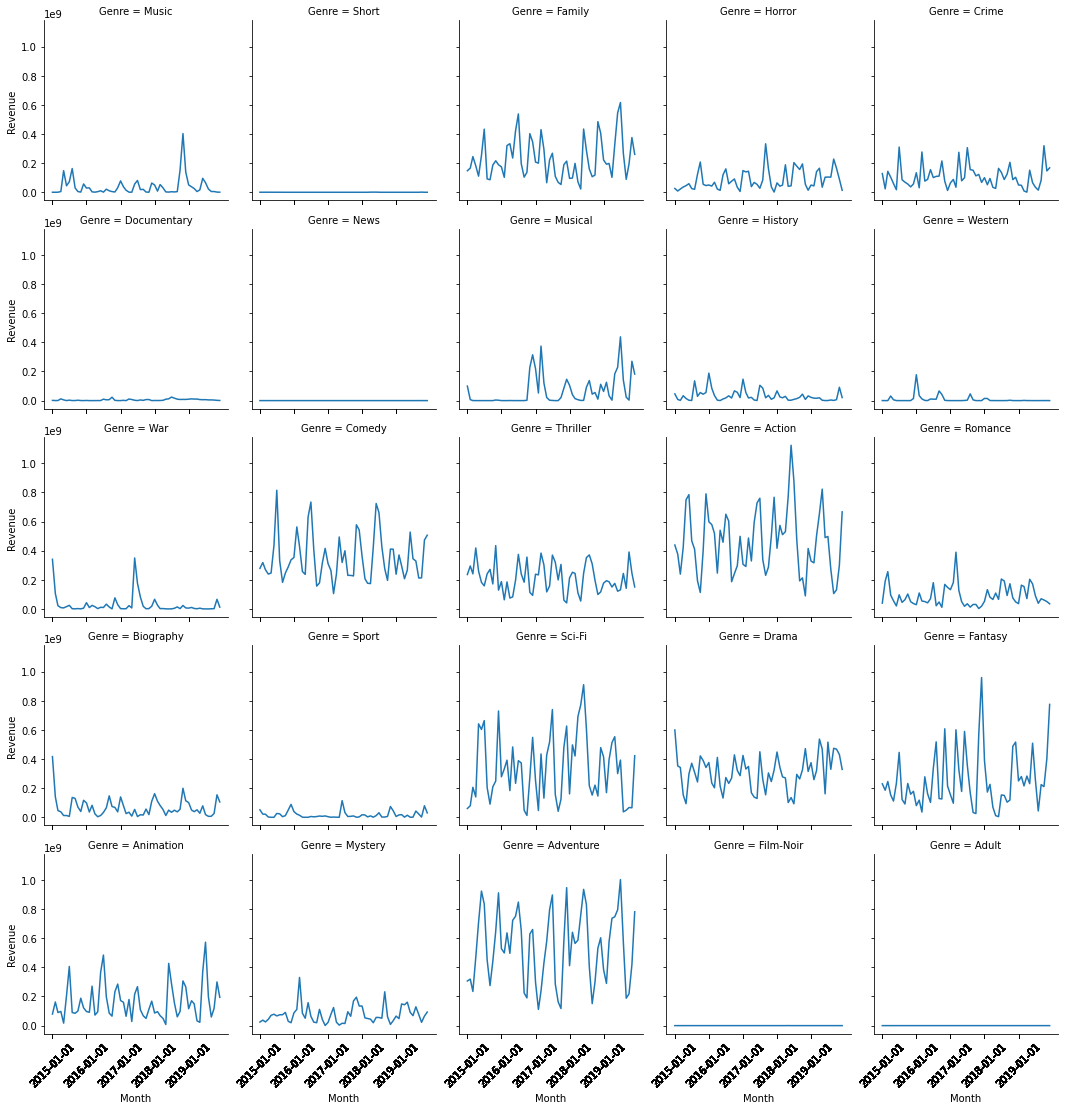

In [22]:
# create new data frame with only movie data to show the monthly revenue trends over time

cf = df[['Month', 'Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult']]

# melt data so the genre is categorical variable and revenue is the value 
cf = pd.melt(cf, id_vars=['Month'], value_vars=['Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult'],
        var_name='Genre', value_name='Revenue')



g = sns.FacetGrid(cf, col="Genre", col_wrap=5, height=3)
g.map(sns.lineplot, "Month", "Revenue", )
g.set(xticks=cf.Month[0::12])
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

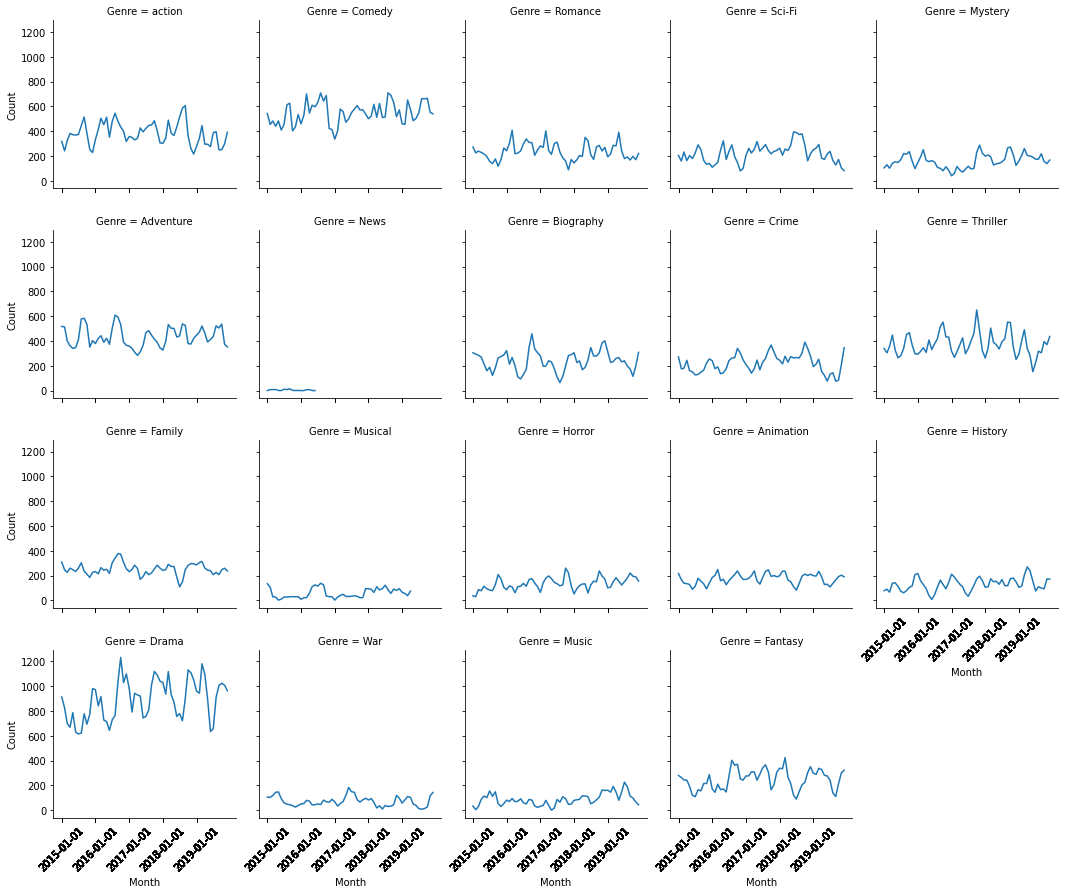

In [23]:
# making a facetgrid with count values instead of revenue

df_count = pd.read_pickle('econ_count_data.pkl')
count = df_count.reset_index()
count = count[['Month','action', 'Comedy', 'Romance', 'Sci-Fi', 'Mystery',
       'Adventure', 'News', 'Biography', 'Crime', 'Thriller',
       'Family', 'Musical', 'Horror', 'Animation', 'History', 'Drama',
       'War', 'Music', 'Fantasy']]

count = pd.melt(count, id_vars=['Month'], value_vars=['action', 'Comedy', 'Romance', 'Sci-Fi', 'Mystery',
       'Adventure', 'News', 'Biography', 'Crime', 'Thriller',
       'Family', 'Musical', 'Horror', 'Animation', 'History', 'Drama',
       'War', 'Music', 'Fantasy', ],
        var_name='Genre', value_name='Count')



g = sns.FacetGrid(count, col="Genre", col_wrap=5, height=3)
g.map(sns.lineplot, "Month", "Count")
g.set(xticks=count.Month[0::12])
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

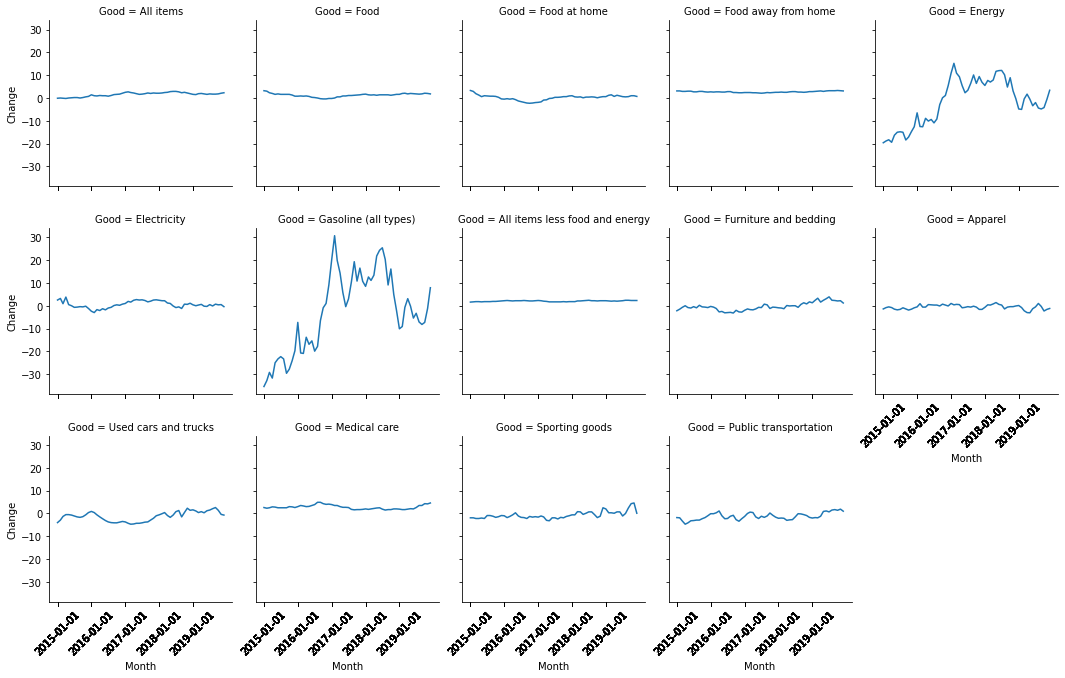

In [24]:
# now do the same witht the price data only
cf = df[['Month', 'All items', 'Food', 'Food at home', 'Food away from home',
       'Energy', 'Electricity', 'Gasoline (all types)',
       'All items less food and energy', 'Furniture and bedding', 'Apparel',
       'Used cars and trucks', 'Medical care', 'Sporting goods',
       'Public transportation']]

cf = pd.melt(cf, id_vars=['Month'], value_vars=['All items', 'Food', 'Food at home', 'Food away from home',
       'Energy', 'Electricity', 'Gasoline (all types)',
       'All items less food and energy', 'Furniture and bedding', 'Apparel',
       'Used cars and trucks', 'Medical care', 'Sporting goods',
       'Public transportation'],
        var_name='Good', value_name='Change')



g = sns.FacetGrid(cf, col="Good", col_wrap=5, height=3)
g.map(sns.lineplot, "Month", "Change")
g.set(xticks=cf.Month[0::12])
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


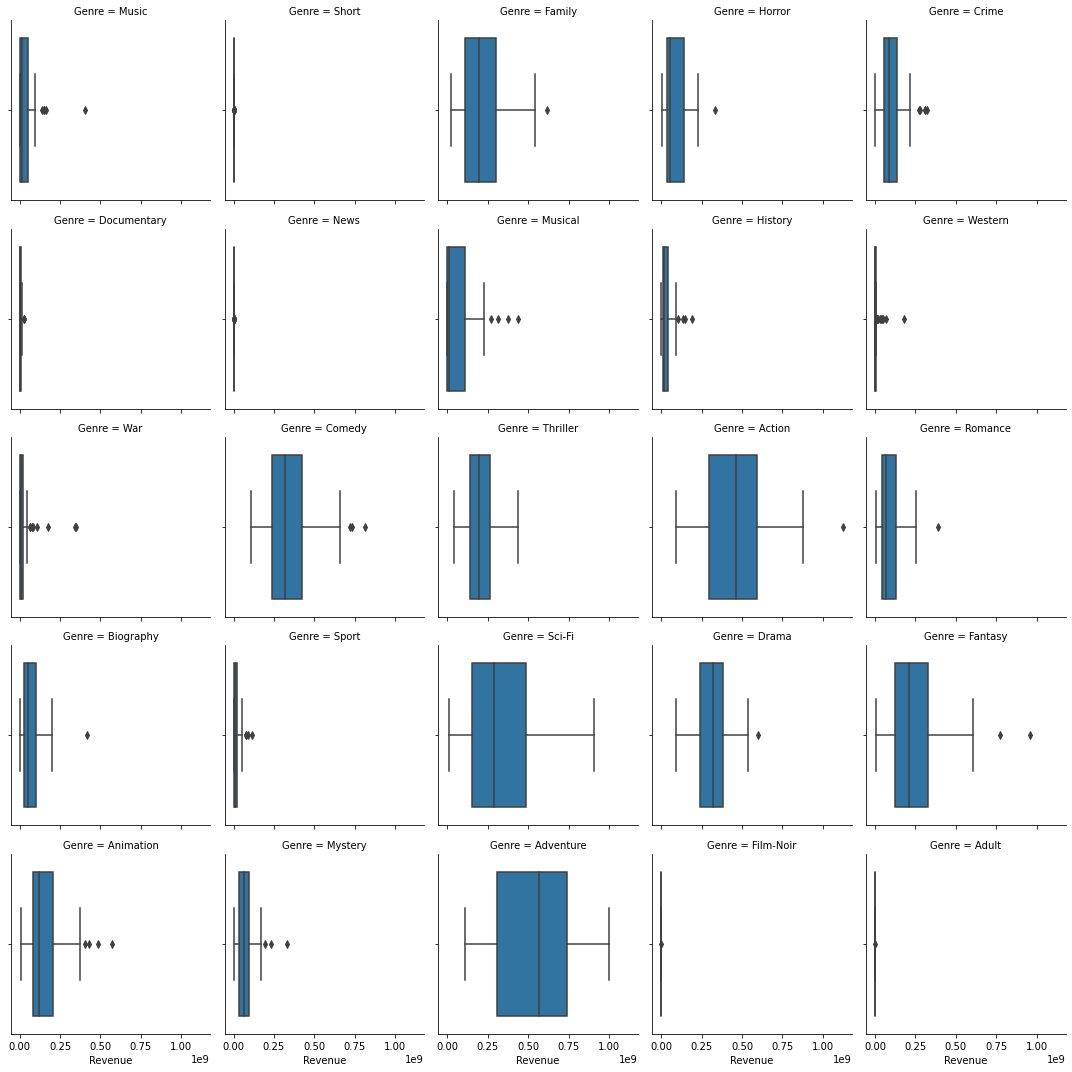

In [26]:
# plot box plots to check for major outliers
cf = df[['Month', 'Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult']]

# melt data so the genre is categorical variable and revenue is the value 
cf = pd.melt(cf, id_vars=['Month'], value_vars=['Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult'],
        var_name='Genre', value_name='Revenue')

g = sns.FacetGrid(cf, col="Genre", col_wrap=5, height=3)
g.map(sns.boxplot, "Revenue")

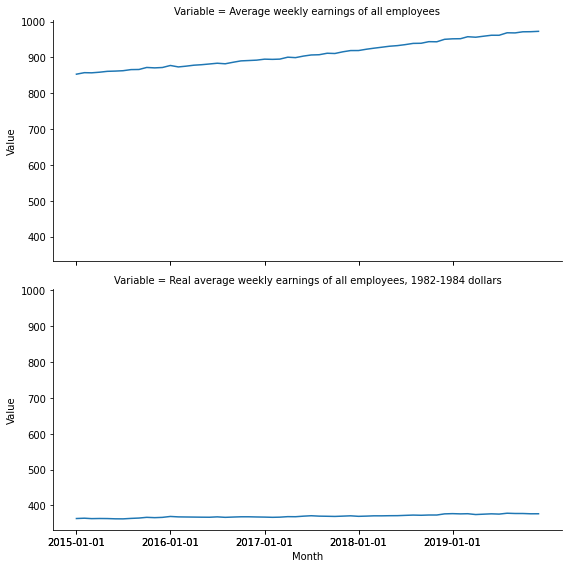

In [27]:
# Visualize trends in the data

# trend data for weekly earnings part 1
cf = df[['Month', 'Average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars']]

cf = pd.melt(cf, id_vars=['Month'], value_vars=['Average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars'],
        var_name='Variable', value_name='Value')



g = sns.FacetGrid(cf, row="Variable", height=4, aspect=2)
g.map(sns.lineplot, "Month", "Value")
g.set(xticks=cf.Month[0::12]);

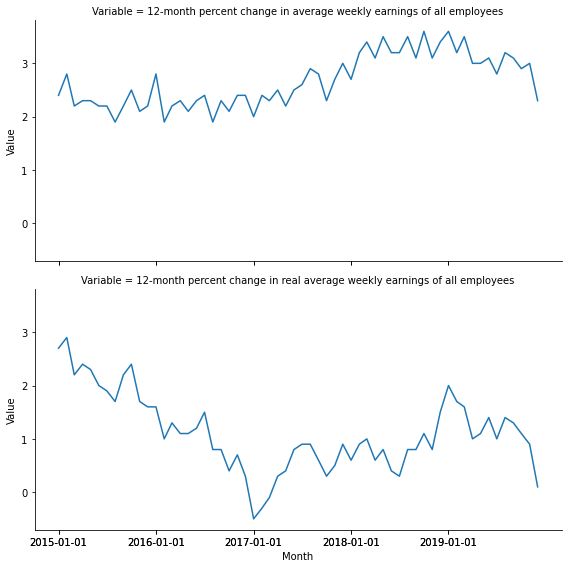

In [28]:
# trend data for weekly earnings part 1 (percentages)
cf = df[['Month', '12-month percent change in average weekly earnings of all employees',
       '12-month percent change in real average weekly earnings of all employees']]

cf = pd.melt(cf, id_vars=['Month'], value_vars=['12-month percent change in average weekly earnings of all employees',
       '12-month percent change in real average weekly earnings of all employees'],
        var_name='Variable', value_name='Value')



g = sns.FacetGrid(cf, row="Variable", height=4, aspect=2)
g.map(sns.lineplot, "Month", "Value")
g.set(xticks=cf.Month[0::12]);

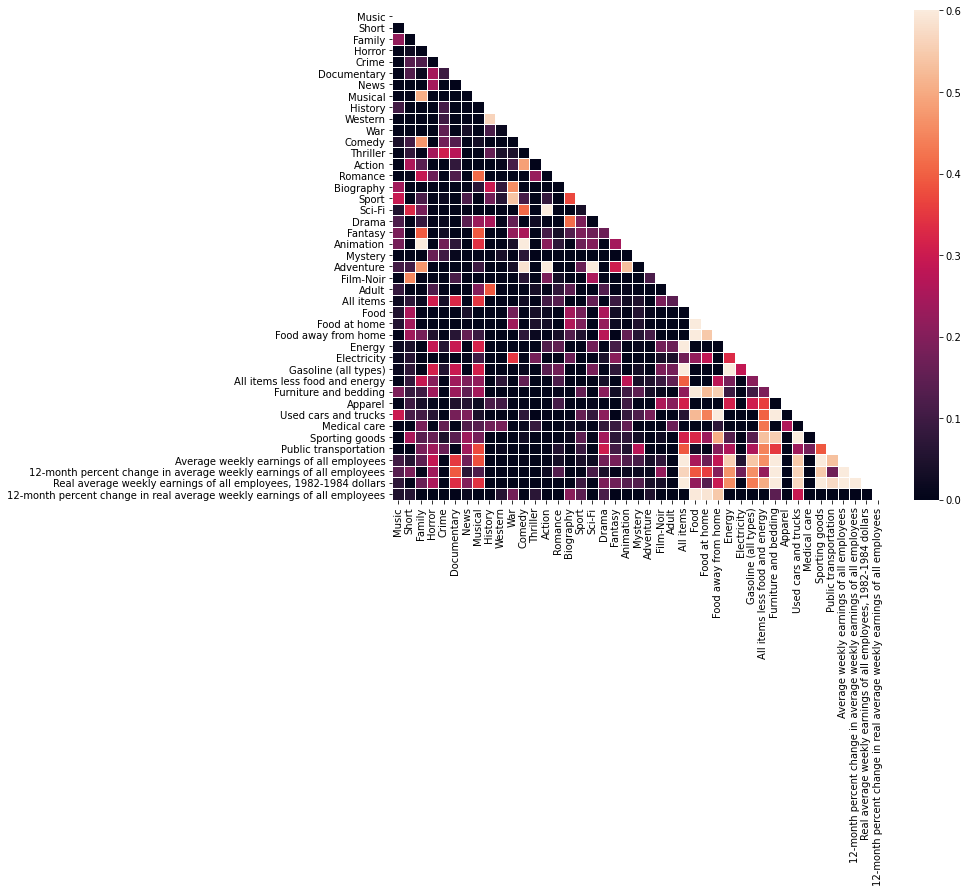

In [29]:
# Compute the correlation matrix
corr = df.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))


sns.heatmap(corr, mask=mask, vmin=0, vmax=.6,
            linewidths=.5);

In [30]:
df_count = pd.read_pickle('econ_count_data.pkl')
df_count.drop(['Adult', 'Film-Noir'], axis=1, inplace=True)
df_count.head()

,Month,action,Comedy,Romance,Sci-Fi,Mystery,Documentary,Adventure,News,Biography,...,Energy,Electricity,Gasoline (all types),All items less food and energy,Furniture and bedding,Apparel,Used cars and trucks,Medical care,Sporting goods,Public transportation
0,2015-01-01,318,543,273,205,105,100,518,1.0,306,...,-19.6,2.5,-35.4,1.6,-2.2,-1.4,-4.0,2.6,-1.9,-1.8
1,2015-02-01,242,455,226,160,130,85,514,9.0,295,...,-18.8,3.2,-32.8,1.7,-1.5,-0.8,-2.9,2.3,-1.9,-1.9
2,2015-03-01,324,483,240,233,102,108,401,9.0,286,...,-18.3,0.9,-29.2,1.8,-0.7,-0.5,-1.3,2.5,-2.2,-3.3
3,2015-04-01,383,440,230,164,142,145,362,10.0,271,...,-19.4,3.8,-31.7,1.8,0.0,-0.8,-0.5,2.9,-2.2,-4.7
4,2015-05-01,372,483,217,204,154,137,341,2.0,217,...,-16.3,0.5,-25.0,1.7,-0.8,-1.5,-0.5,2.8,-2.0,-4.1


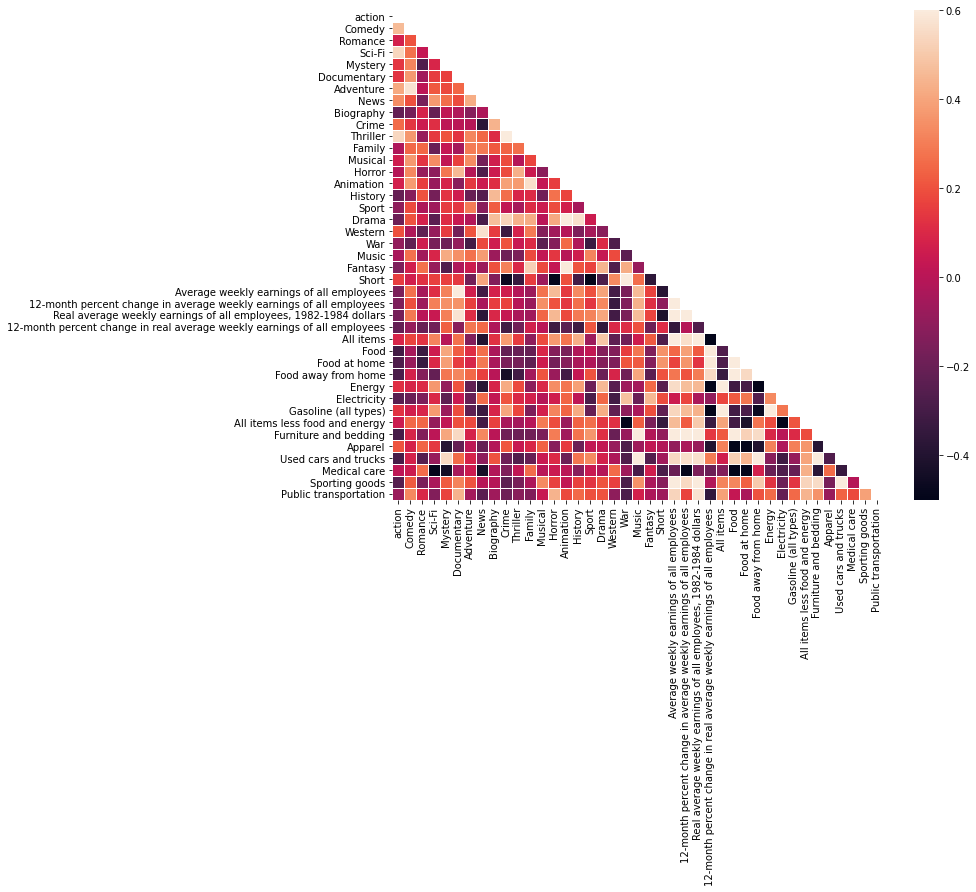

In [31]:
# Compute the correlation matrix for the count data

count_corr = df_count.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(count_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))


sns.heatmap(count_corr, mask=mask,  vmin=-0.5, vmax=.6,
            linewidths=.5);

## Modeling the Data

In [32]:
## STEPWISE REGRESSION ANALYSIS

# import sm for OLS regression 
import statsmodels.api as sm

** Reload alldat here

In [33]:
# create a new dataframe with all data to be used in backwards stepwise regression
# with open('alldat.pkl', "rb") as fh:
#   af = pickle.load(fh)

af = pd.read_pickle('alldat.pkl')

df = af[['Month', 'Crime', 'Drama', 'Thriller', 'Animation', 'Action', 'Horror', 'Documentary',
         'Musical',  'All items', 'Food', 'Food at home', 'Energy',  
         'Gasoline (all types)', 'Public transportation', 'Average weekly earnings of all employees']]
df.columns

Index(['Month', 'Crime', 'Drama', 'Thriller', 'Animation', 'Action', 'Horror',
       'Documentary', 'Musical', 'All items', 'Food', 'Food at home', 'Energy',
       'Gasoline (all types)', 'Public transportation',
       'Average weekly earnings of all employees'],
      dtype='object')

In [34]:
# Backward stepwise regression
def stepwise(x_in, x_col, y_out, y_col):
    for val in y_col:
        xval = x_in.copy()
        xcols = x_col.copy()
        max_aic = 10000000000.0
        while True:
            X = sm.add_constant(xval)
            y = y_out[val]

            f = sm.OLS(y, X).fit()
            model = f.summary()
            aic = f.aic

            if len(f.pvalues) == 1:
                break
                
            max_value = max(f.pvalues[1:])
            maxindex = list(f.pvalues).index(max_value)-1

            if aic < max_aic and max_value > 0.05:
                xval = xval.drop(columns=[xcols[maxindex]])
                xcols = xcols[0:maxindex]+xcols[maxindex+1:]


            elif aic < max_aic and max_value <= 0.05:
                print('\n\nfinal model:')
                print(model)
                break


            else:
                print('\n\nfinal model:')
                print(model)
                break

In [35]:
x = af[['Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult']]

xs = ['Music', 'Short', 'Family', 'Horror', 'Crime', 'Documentary',
       'News', 'Musical', 'History', 'Western', 'War', 'Comedy', 'Thriller',
       'Action', 'Romance', 'Biography', 'Sport', 'Sci-Fi', 'Drama', 'Fantasy',
       'Animation', 'Mystery', 'Adventure', 'Film-Noir', 'Adult']


y = af[['All items',
       'Food', 'Food at home', 'Food away from home', 'Energy', 'Electricity',
       'Gasoline (all types)', 'All items less food and energy',
       'Furniture and bedding', 'Apparel', 'Used cars and trucks',
       'Medical care', 'Sporting goods', 'Public transportation',
       'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees']]


ys = ['All items',
       'Food', 'Food at home', 'Food away from home', 'Energy', 'Electricity',
       'Gasoline (all types)', 'All items less food and energy',
       'Furniture and bedding', 'Apparel', 'Used cars and trucks',
       'Medical care', 'Sporting goods', 'Public transportation',
       'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees']

                

# stepwise(x,xs,y,ys)
stepwise(y,ys,x,xs)



final model:
                            OLS Regression Results                            
Dep. Variable:                  Music   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.102
Date:                Fri, 20 Aug 2021   Prob (F-statistic):            0.00314
Time:                        23:46:38   Log-Likelihood:                -1152.4
No. Observations:                  60   AIC:                             2317.
Df Residuals:                      54   BIC:                             2329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------



final model:
                            OLS Regression Results                            
Dep. Variable:            Documentary   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     7.369
Date:                Fri, 20 Aug 2021   Prob (F-statistic):            0.00142
Time:                        23:46:39   Log-Likelihood:                -1008.9
No. Observations:                  60   AIC:                             2024.
Df Residuals:                      57   BIC:                             2030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------



final model:
                            OLS Regression Results                            
Dep. Variable:                 Comedy   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3.072
Date:                Fri, 20 Aug 2021   Prob (F-statistic):             0.0235
Time:                        23:46:40   Log-Likelihood:                -1210.5
No. Observations:                  60   AIC:                             2431.
Df Residuals:                      55   BIC:                             2441.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------



final model:
                            OLS Regression Results                            
Dep. Variable:                  Sport   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     2.907
Date:                Fri, 20 Aug 2021   Prob (F-statistic):             0.0159
Time:                        23:46:41   Log-Likelihood:                -1095.4
No. Observations:                  60   AIC:                             2205.
Df Residuals:                      53   BIC:                             2219.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const            



final model:
                            OLS Regression Results                            
Dep. Variable:              Animation   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.910
Date:                Fri, 20 Aug 2021   Prob (F-statistic):             0.0306
Time:                        23:46:42   Log-Likelihood:                -1199.2
No. Observations:                  60   AIC:                             2402.
Df Residuals:                      58   BIC:                             2407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [36]:
## Vector Autoregression

# modules for VAR
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [37]:
# first we do grangers causation matrix to see which variables to consider in model

from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



# create a new df to use for grangers test
test = df.copy()
test.set_index('Month', inplace=True)

# generate the causation matrix
gcm = grangers_causation_matrix(test, variables = test.columns)


In [38]:
# save causation matrix
gcm.to_csv('gcm.csv')

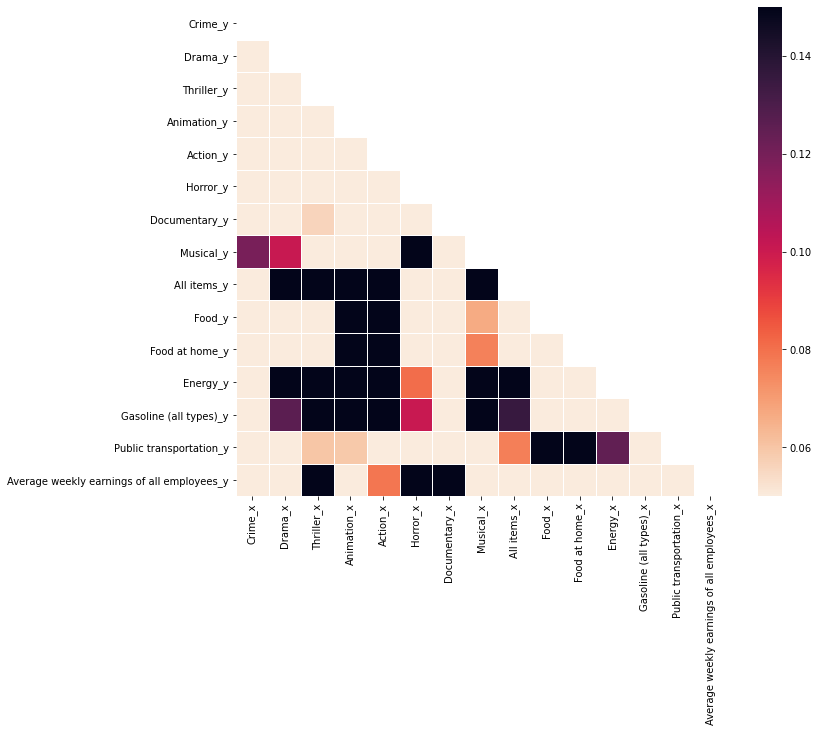

In [39]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(gcm, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


sns.heatmap(gcm, vmin=0.05, mask=mask, vmax=.15,cmap=sns.cm.rocket_r,
            linewidths=.5);

# here we want to look for lightest cells (p <0.05)

In [40]:
# next do cointegration test is to confirm which to keep

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

        
test = df.reset_index()
test = test.drop(columns=['Month', 'index', 'Musical', 'Documentary'])
test
cointegration_test(test)

# want to choose variable where value is True


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Crime  ::  5291.73   > nan       =>   False
Drama  ::  4069.27   > 311.1288  =>   True
Thriller ::  2923.35   > 263.2603  =>   True
Animation ::  2170.18   > 219.4051  =>   True
Action ::  1566.59   > 179.5199  =>   True
Horror ::  1156.46   > 143.6691  =>   True
All items ::  802.32    > 111.7797  =>   True
Food   ::  519.57    > 83.9383   =>   True
Food at home ::  266.71    > 60.0627   =>   True
Energy ::  130.49    > 40.1749   =>   True
Gasoline (all types) ::  56.58     > 24.2761   =>   True
Public transportation ::  17.28     > 12.3212   =>   True
Average weekly earnings of all employees ::  6.38      > 4.1296    =>   True


/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/vecm.py:577: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn("Critical values are only available for time series "


In [41]:
#generate our raw data set which is the variables from above that were "True"
raw = df.set_index('Month')
raw = raw[['Thriller', 'Animation', 'Action', 'Horror', 'All items', 
             'Food', 'Food at home', 'Energy', 'Gasoline (all types)', 'Public transportation']]
raw

,Thriller,Animation,Action,Horror,All items,Food,Food at home,Energy,Gasoline (all types),Public transportation
Month,,,,,,,,,,
2015-01-01,236170777,79476683,438902995,26149007,-0.1,3.2,3.3,-19.6,-35.4,-1.8
2015-02-01,295058851,162163710,376304732,8478090,0.0,3.0,2.9,-18.8,-32.8,-1.9
2015-03-01,240864736,89926719,239011408,22254918,-0.1,2.3,1.9,-18.3,-29.2,-3.3
2015-04-01,418681880,97270366,424271339,36005673,-0.2,2.0,1.3,-19.4,-31.7,-4.7
2015-05-01,260164543,17094382,749052069,45282366,0.0,1.6,0.6,-16.3,-25.0,-4.1
2015-06-01,182684741,205738057,784637762,58912266,0.1,1.8,1.0,-15.0,-23.3,-3.2
2015-07-01,158478527,406283840,468455544,25313337,0.2,1.6,0.9,-14.8,-22.3,-3.1
2015-08-01,240530827,89830056,409916346,20310243,0.2,1.6,0.8,-15.0,-23.3,-2.9
2015-09-01,271770710,84884969,193027262,122913338,0.0,1.6,0.8,-18.4,-29.6,-2.9


In [42]:
# split into test/train sets

split = int(round(0.7*(len(raw)), 0))
split

train = raw[0:split]
test = raw[split:]

In [43]:
# adfuller test for stationary series

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [44]:
# in this case, one of the series was non-stiationary, so I differenced once and then it was stationary
diff = train.diff().dropna()

for name, column in diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Thriller" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.9898
 No. Lags Chosen       = 4
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Animation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9481
 No. Lags Chosen       = 10
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.04. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Action" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Leve

In [45]:
# test different VAR model order sizes to see which has the best accuracy (based on AIC)
model = VAR(diff)
for i in range(1,10):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print()

Lag Order = 1
AIC :  139.8593968981932
BIC :  144.50381539700655

Lag Order = 2
AIC :  139.74513401362998
BIC :  148.70277364663576

Lag Order = 3
AIC :  57.5872322280851
BIC :  70.94648774164246

Lag Order = 4
AIC :  -142.98354263702086
BIC :  -125.13283063204432

Lag Order = 5
AIC :  -157.37551722594765
BIC :  -134.94233226448608

Lag Order = 6
AIC :  -173.52357176781538
BIC :  -146.41607698185703

Lag Order = 7
AIC :  -196.23507359745247
BIC :  -164.36107440693849

Lag Order = 8
AIC :  -242.30145448101953
BIC :  -205.568996154115

Lag Order = 9
AIC :  -463.6179996064935
BIC :  -421.9361348706263



/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [46]:
# best accuracy at 3, show model summary
fitted = model.fit(3)
fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Aug, 2021
Time:                     23:46:54
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    70.9465
Nobs:                     38.0000    HQIC:                   62.3404
Log likelihood:          -1323.35    FPE:                7.26893e+27
AIC:                      57.5872    Det(Omega_mle):     1.87108e+25
--------------------------------------------------------------------
Results for equation Thriller
                                 coefficient        std. error           t-stat            prob
-----------------------------------------------------------------------------------------------
const                        -5088950.325590   22352743.205842           -0.228           0.820
L1.Thriller                        -0.480884          0.201801           -2.383           0.0

In [47]:
# perform durbin watson test to make sure there isn't major collinearity between residuals

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted.resid)

for col, val in zip(diff.columns, out):
    print(col, ':', round(val, 2))

Thriller : 1.58
Animation : 1.81
Action : 2.22
Horror : 1.9
All items : 1.69
Food : 1.94
Food at home : 1.94
Energy : 1.65
Gasoline (all types) : 1.71
Public transportation : 1.46


In [48]:
# take the most recent 3 observations from training data to fit forecast

lo = fitted.k_ar

forecast_in = diff.values[-lo:]
forecast_in

array([[-1.34523765e+08, -1.87016350e+07,  2.03683050e+07,
         1.39560080e+08,  1.00000000e-01,  1.00000000e-01,
         1.00000000e-01,  9.00000000e-01,  2.30000000e+00,
        -9.00000000e-01],
       [-5.58190120e+07, -4.17512070e+07,  2.42051890e+08,
        -1.47800348e+08,  3.00000000e-01, -2.00000000e-01,
        -4.00000000e-01,  3.80000000e+00,  8.40000000e+00,
         2.00000000e-01],
       [ 1.91219569e+08,  4.19453861e+08,  3.51337453e+08,
         3.35306400e+06,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  3.00000000e-01,  2.50000000e+00,
         1.00000000e-01]])

In [49]:
# forecast the last 30% of data to compare with test data
s = len(raw) - split
fc = fitted.forecast(y=forecast_in, steps=s)
df_forecast = pd.DataFrame(fc, index=raw.index[split:], columns=raw.columns + '_1d')
df_forecast.round(2)

,Thriller_1d,Animation_1d,Action_1d,Horror_1d,All items_1d,Food_1d,Food at home_1d,Energy_1d,Gasoline (all types)_1d,Public transportation_1d
Month,,,,,,,,,,
2018-07-01,2.043167e+07,-1.741452e+08,-2.965396e+08,8.656687e+07,0.20,-0.24,-0.44,1.85,3.29,1.31
2018-08-01,7.625027e+07,-2.510987e+08,-2.048186e+08,7.196674e+07,0.39,0.13,0.04,3.90,7.88,0.92
2018-09-01,-2.742756e+08,-1.385968e+08,1.379845e+08,-5.396849e+07,-0.62,-0.03,0.04,-7.77,-17.29,-0.13
2018-10-01,2.268537e+08,4.358448e+08,2.274485e+07,-9.156190e+07,0.24,-0.04,-0.07,3.89,6.69,-1.31
2018-11-01,-1.833563e+08,-1.001449e+08,4.009591e+08,-1.176806e+08,-0.18,-0.13,-0.11,-2.13,-4.88,-1.00
2018-12-01,5.859903e+07,-2.805018e+07,-1.199097e+08,1.536544e+08,0.36,-0.05,-0.19,2.76,7.04,-0.32
2019-01-01,8.159611e+07,-1.286776e+08,-3.586790e+08,1.051893e+08,0.32,-0.05,-0.02,4.51,9.60,1.77
2019-02-01,1.513947e+08,1.334368e+08,1.116923e+08,-7.016084e+07,-0.07,0.00,-0.01,-0.77,-2.02,0.28
2019-03-01,-3.060922e+08,-9.589491e+07,8.269967e+06,7.181771e+06,0.29,-0.04,-0.04,2.66,4.96,0.09


In [50]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# invert results to get final values
df_results = invert_transformation(diff, df_forecast, second_diff=False)        
df_results

,Thriller_1d,Animation_1d,Action_1d,Horror_1d,All items_1d,Food_1d,Food at home_1d,Energy_1d,Gasoline (all types)_1d,Public transportation_1d,Thriller_forecast,Animation_forecast,Action_forecast,Horror_forecast,All items_forecast,Food_forecast,Food at home_forecast,Energy_forecast,Gasoline (all types)_forecast,Public transportation_forecast
Month,,,,,,,,,,,,,,,,,,,,
2018-07-01,2.043167e+07,-1.741452e+08,-2.965396e+08,8.656687e+07,0.202609,-0.243073,-0.444937,1.850795,3.290686,1.306752,2.116512e+08,2.453086e+08,5.479783e+07,8.991994e+07,0.302609,-0.043073,-0.144937,2.150795,5.790686,1.406752
2018-08-01,7.625027e+07,-2.510987e+08,-2.048186e+08,7.196674e+07,0.386354,0.127373,0.041249,3.896811,7.878295,0.916675,2.879015e+08,-5.790110e+06,-1.500207e+08,1.618867e+08,0.688963,0.084300,-0.103688,6.047605,13.668981,2.323427
2018-09-01,-2.742756e+08,-1.385968e+08,1.379845e+08,-5.396849e+07,-0.615265,-0.029882,0.042448,-7.769300,-17.294305,-0.130447,1.362587e+07,-1.443870e+08,-1.203620e+07,1.079182e+08,0.073698,0.054418,-0.061240,-1.721695,-3.625324,2.192980
2018-10-01,2.268537e+08,4.358448e+08,2.274485e+07,-9.156190e+07,0.243021,-0.041213,-0.072952,3.891692,6.689932,-1.313253,2.404796e+08,2.914578e+08,1.070865e+07,1.635629e+07,0.316718,0.013205,-0.134192,2.169998,3.064609,0.879727
2018-11-01,-1.833563e+08,-1.001449e+08,4.009591e+08,-1.176806e+08,-0.178132,-0.134677,-0.105774,-2.125124,-4.884846,-0.998136,5.712326e+07,1.913130e+08,4.116677e+08,-1.013243e+08,0.138587,-0.121472,-0.239966,0.044874,-1.820238,-0.118410
2018-12-01,5.859903e+07,-2.805018e+07,-1.199097e+08,1.536544e+08,0.357701,-0.050293,-0.190625,2.762692,7.039213,-0.317407,1.157223e+08,1.632628e+08,2.917580e+08,5.233010e+07,0.496287,-0.171765,-0.430590,2.807566,5.218975,-0.435817
2019-01-01,8.159611e+07,-1.286776e+08,-3.586790e+08,1.051893e+08,0.318767,-0.048091,-0.022299,4.512145,9.595868,1.768768,1.973184e+08,3.458519e+07,-6.692106e+07,1.575194e+08,0.815054,-0.219856,-0.452889,7.319711,14.814844,1.332951
2019-02-01,1.513947e+08,1.334368e+08,1.116923e+08,-7.016084e+07,-0.071511,0.002771,-0.006170,-0.773057,-2.021671,0.278446,3.487131e+08,1.680220e+08,4.477126e+07,8.735858e+07,0.743543,-0.217085,-0.459059,6.546654,12.793173,1.611397
2019-03-01,-3.060922e+08,-9.589491e+07,8.269967e+06,7.181771e+06,0.291822,-0.040480,-0.044567,2.655521,4.958766,0.088109,4.262083e+07,7.212712e+07,5.304123e+07,9.454035e+07,1.035365,-0.257564,-0.503626,9.202176,17.751938,1.699506


In [51]:
actual_action = df_results['Action_1d']
predict_action_group = df_results['Action_forecast']

/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/pan

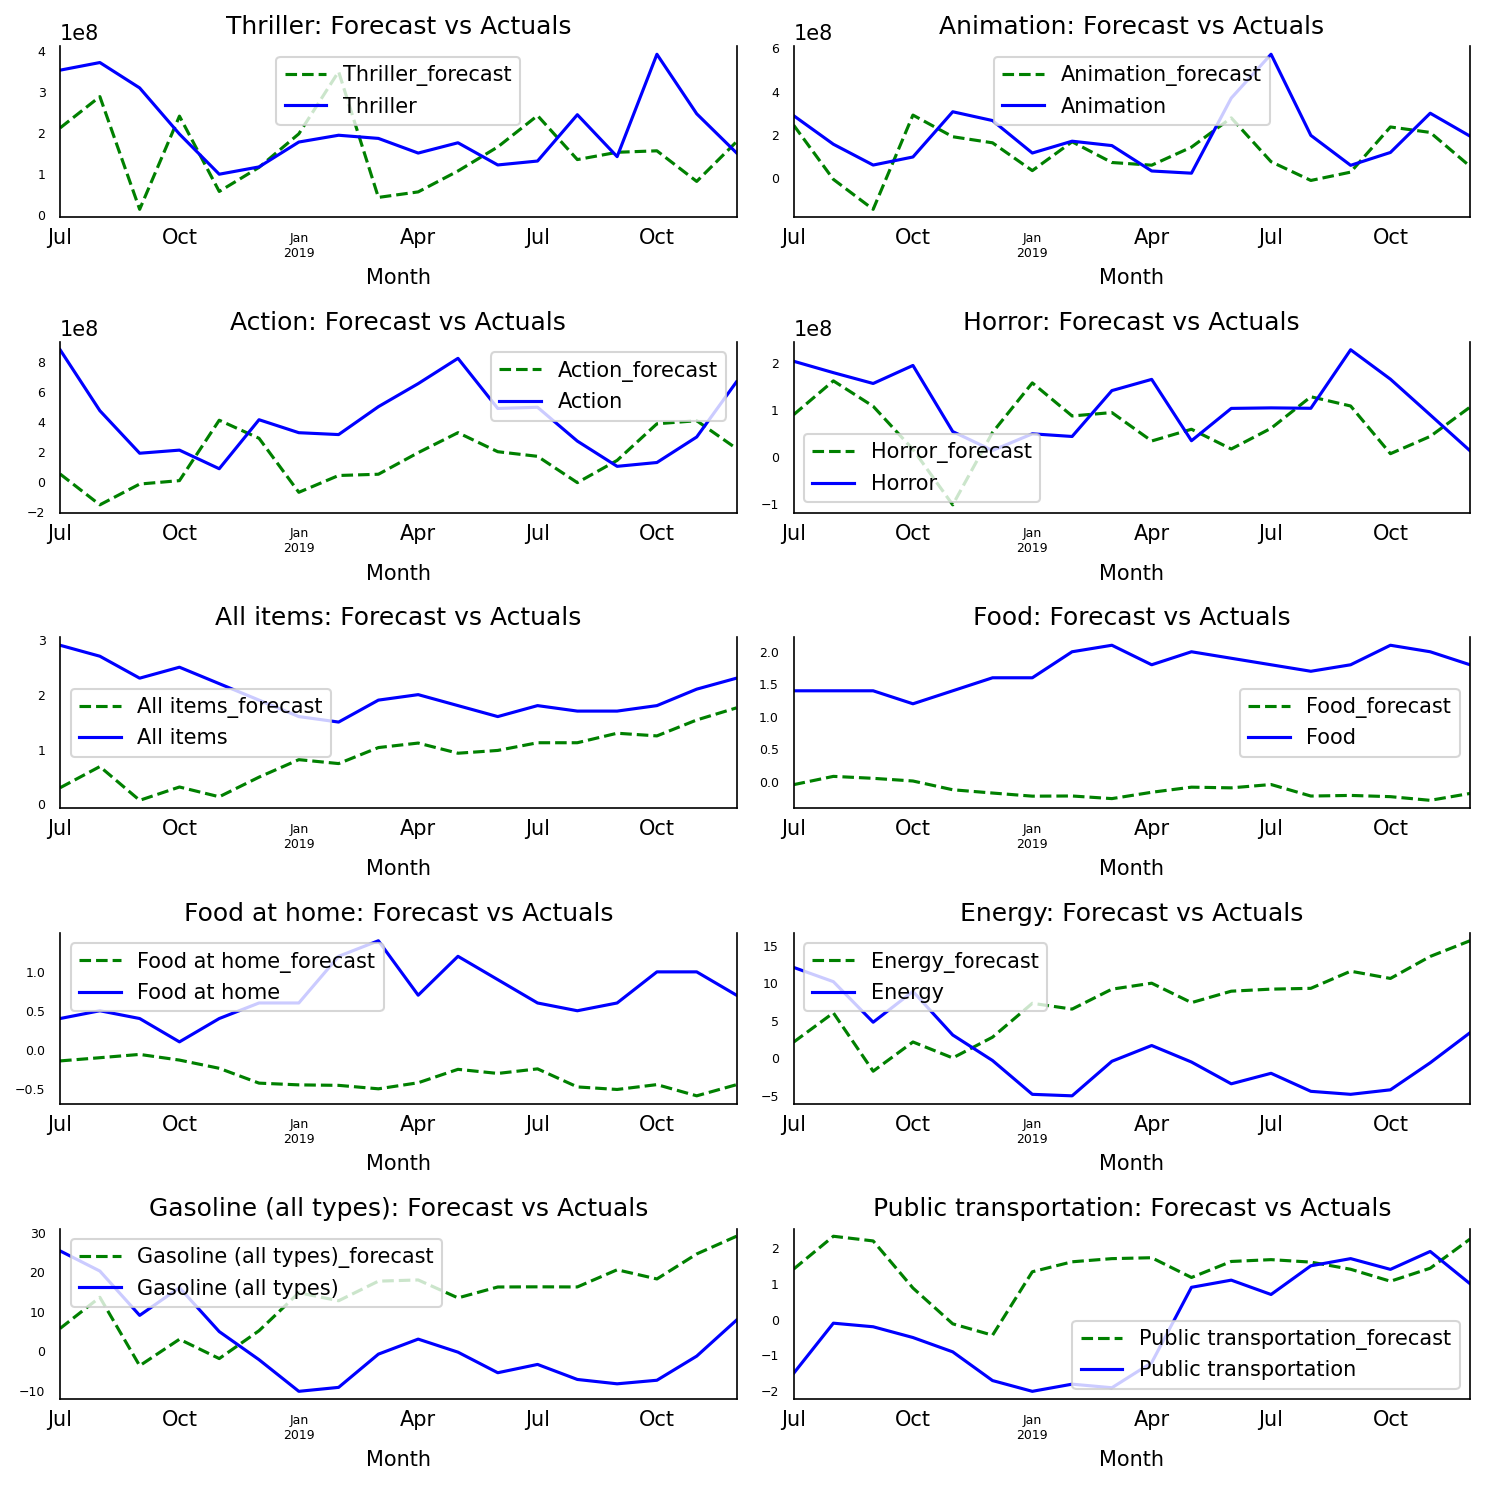

In [52]:
# plot predicted vs actual

fig, axes = plt.subplots(nrows=int(len(raw.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(raw.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(color='g', linestyle='dashed', legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][:].plot(color='b', legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [53]:
# function to display forecast accuracy for each variable

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})


cols = list(test.columns)

for col in cols:
    print(f'\nForecast Accuracy of: {col}')
    accuracy_prod = forecast_accuracy(df_results[col+'_forecast'].values, test[col])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: Thriller
mape :  0.4505
me :  -53725501.8896
mae :  99340991.7787
mpe :  -0.1627
rmse :  125927133.8986
corr :  0.1612
minmax :  0.3994

Forecast Accuracy of: Animation
mape :  1.0766
me :  -77215639.6222
mae :  128207755.2245
mpe :  -0.0676
rmse :  166803360.2875
corr :  0.3037
minmax :  0.7084

Forecast Accuracy of: Action
mape :  1.0015
me :  -258500576.2594
mae :  339249801.0732
mpe :  -0.3023
rmse :  387167420.148
corr :  -0.0413
minmax :  0.762

Forecast Accuracy of: Horror
mape :  1.2674
me :  -45119472.0706
mae :  81937027.723
mpe :  0.2548
rmse :  96117749.733
corr :  0.1115
minmax :  0.6947

Forecast Accuracy of: All items
mape :  0.5377
me :  -1.1427
mae :  1.1427
mpe :  -0.5377
rmse :  1.3426
corr :  -0.3933
minmax :  0.5377

Forecast Accuracy of: Food
mape :  1.071
me :  -1.8539
mae :  1.8539
mpe :  -1.071
rmse :  1.8866
corr :  -0.6883
minmax :  1.071

Forecast Accuracy of: Food at home
mape :  1.5527
me :  -1.0582
mae :  1.0582
mpe :  -1.5527
rmse 

<ipython-input-53-e7f3864de129>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-53-e7f3864de129>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


### Model with Action genre only and all economic factors

** Reload alldat here

In [54]:
## Testing with just Action and all economic factors so the other genre data is not factored in to the model

with open('alldat.pkl', "rb") as fh:
  af = pickle.load(fh)

df_a = af[['Month', 'Action','All items',
       'Food', 'Food at home', 'Food away from home', 'Energy', 'Electricity',
       'Gasoline (all types)', 'All items less food and energy',
       'Furniture and bedding', 'Apparel', 'Used cars and trucks',
       'Medical care', 'Sporting goods', 'Public transportation',
       'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees']]

df_a.columns

Index(['Month', 'Action', 'All items', 'Food', 'Food at home',
       'Food away from home', 'Energy', 'Electricity', 'Gasoline (all types)',
       'All items less food and energy', 'Furniture and bedding', 'Apparel',
       'Used cars and trucks', 'Medical care', 'Sporting goods',
       'Public transportation', 'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees'],
      dtype='object')

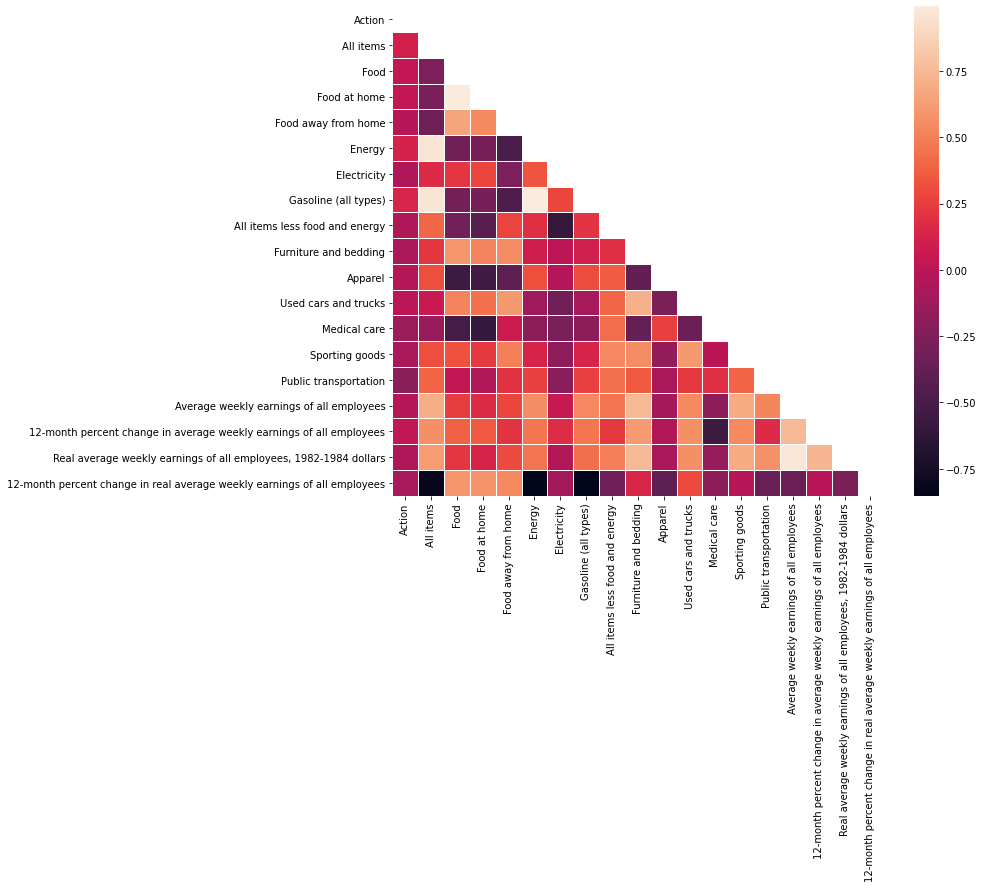

In [55]:
corr = df_a.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask,
            linewidths=.5);

In [56]:
# create a new df to use for grangers test
test = df_a.copy()
test.set_index('Month', inplace=True)

# generate the causation matrix
gcm = grangers_causation_matrix(test, variables = test.columns)

In [57]:
# save causation matrix
gcm.to_csv('gcm.csv')

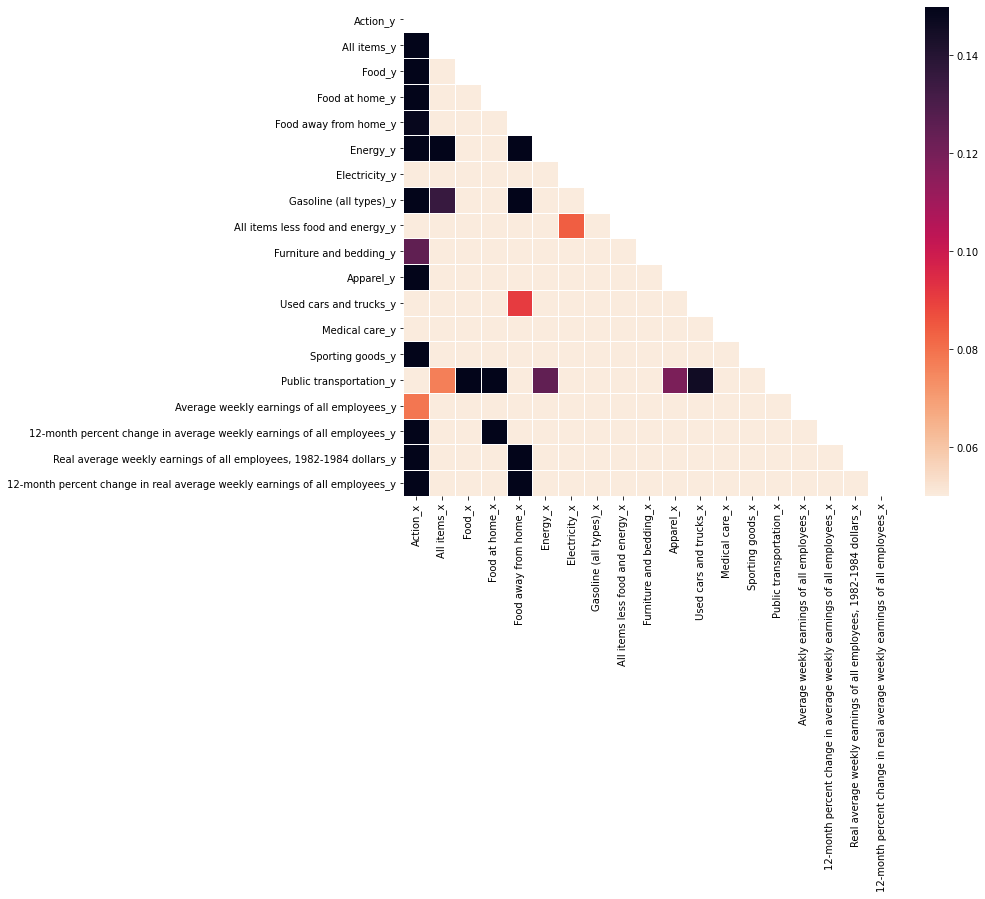

In [58]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(gcm, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


sns.heatmap(gcm, vmin=0.05, mask=mask,vmax=.15,cmap=sns.cm.rocket_r,
            linewidths=.5);

# here we want to look for lightest cells (p <0.05)

In [59]:
df_a.columns

Index(['Month', 'Action', 'All items', 'Food', 'Food at home',
       'Food away from home', 'Energy', 'Electricity', 'Gasoline (all types)',
       'All items less food and energy', 'Furniture and bedding', 'Apparel',
       'Used cars and trucks', 'Medical care', 'Sporting goods',
       'Public transportation', 'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees'],
      dtype='object')

In [60]:
# Items to leave in were chosen by adding in one at a time and checking 
# what keeps the matrix positive definite in the next section
df = df_a[['Month', 'Action', 'All items', 'Food', 'Food at home', 'Food away from home', 'Energy', 'Electricity',
           'Gasoline (all types)']]

In [61]:
# next do cointegration test is to confirm which to keep

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

        
test = df.reset_index()
test = test.drop(columns=['Month','index'])
test
cointegration_test(test)

# want to choose variable where value is True

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Action ::  2948.7    > 143.6691  =>   True
All items ::  1582.41   > 111.7797  =>   True
Food   ::  309.12    > 83.9383   =>   True
Food at home ::  202.47    > 60.0627   =>   True
Food away from home ::  114.48    > 40.1749   =>   True
Energy ::  49.45     > 24.2761   =>   True
Electricity ::  16.53     > 12.3212   =>   True
Gasoline (all types) ::  2.96      > 4.1296    =>   False


In [62]:
#generate our raw data set which is the variables from above that were "True"
raw = df.set_index('Month')
raw = raw[['Action', 'All items', 'Food', 'Food at home', 'Food away from home', 'Energy', 'Electricity']]
raw.head()

,Action,All items,Food,Food at home,Food away from home,Energy,Electricity
Month,,,,,,,
2015-01-01,438902995,-0.1,3.2,3.3,3.1,-19.6,2.5
2015-02-01,376304732,0.0,3.0,2.9,3.1,-18.8,3.2
2015-03-01,239011408,-0.1,2.3,1.9,2.9,-18.3,0.9
2015-04-01,424271339,-0.2,2.0,1.3,2.9,-19.4,3.8
2015-05-01,749052069,0.0,1.6,0.6,3.0,-16.3,0.5


In [63]:
# split into test/train sets

split = int(round(0.7*(len(raw)), 0))
split

train = raw[0:split]
test = raw[split:]

In [64]:
# adfuller test for stationary series

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [65]:
# difference data to make it stationary
diff = train.diff().dropna()

for name, column in diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Action" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9569
 No. Lags Chosen       = 9
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.0391. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "All items" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3355
 No. Lags Chosen       = 0
 Critical value 1%     = -3.606
 Critical value 5%     = -2.937
 Critical value 10%    = -2.607
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Food" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

In [66]:
# test different VAR model order sizes to see which has the best accuracy (based on AIC)
model = VAR(diff)
for i in range(1,10):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print()

Lag Order = 1
AIC :  23.07834521080708
BIC :  25.44277644656659

Lag Order = 2
AIC :  22.516710891211066
BIC :  26.99553070771396

Lag Order = 3
AIC :  21.13665127954435
BIC :  27.77318466369865

Lag Order = 4
AIC :  5.0605624733654775
BIC :  13.898841831927033

Lag Order = 5


/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:716: RuntimeWarning: divide by zero encountered in true_divide
  omega = sse / df_resid
/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1379: RuntimeWarning: invalid value encountered in multiply
  return self.sigma_u * self.df_resid / self.nobs


ValueError: array must not contain infs or NaNs

In [67]:
# best accuracy at 4, show model summary
fitted = model.fit(4)
fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Aug, 2021
Time:                     23:48:07
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    13.8988
Nobs:                     37.0000    HQIC:                   8.17647
Log likelihood:          -258.125    FPE:                    7038.02
AIC:                      5.06056    Det(Omega_mle):         122.477
--------------------------------------------------------------------
Results for equation Action
                               coefficient         std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                      -3565509.171030    46928078.362078           -0.076           0.939
L1.Action                        -0.582788           0.286493           -2.034           0.042
L1.

In [68]:
# perform durbin watson test to make sure there isn't major collinearity between residuals

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted.resid)

for col, val in zip(diff.columns, out):
    print(col, ':', round(val, 2))

Action : 2.69
All items : 1.63
Food : 2.77
Food at home : 2.66
Food away from home : 2.46
Energy : 2.16
Electricity : 2.63


In [69]:
# take the most recent 3 observations from training data to fit forecast

lo = fitted.k_ar

forecast_in = diff.values[-lo:]
forecast_in

array([[-6.37325430e+07,  2.00000000e-01, -1.00000000e-01,
        -1.00000000e-01, -1.00000000e-01, -7.00000000e-01,
         0.00000000e+00],
       [ 2.03683050e+07,  1.00000000e-01,  1.00000000e-01,
         1.00000000e-01,  0.00000000e+00,  9.00000000e-01,
        -1.00000000e+00],
       [ 2.42051890e+08,  3.00000000e-01, -2.00000000e-01,
        -4.00000000e-01,  2.00000000e-01,  3.80000000e+00,
        -2.00000000e-01],
       [ 3.51337453e+08,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  1.00000000e-01,  3.00000000e-01,
        -1.10000000e+00]])

In [70]:
# forecast the last 30% of data to compare with test data
s = len(raw) - split
fc = fitted.forecast(y=forecast_in, steps=s)
df_forecast = pd.DataFrame(fc, index=raw.index[split:], columns=raw.columns + '_1d')
df_forecast.round(2)

,Action_1d,All items_1d,Food_1d,Food at home_1d,Food away from home_1d,Energy_1d,Electricity_1d
Month,,,,,,,
2018-07-01,-5.113231e+08,0.65,-0.02,-0.26,0.22,8.02,0.01
2018-08-01,2.105440e+08,-0.40,0.14,0.18,0.12,-5.07,-0.26
2018-09-01,-2.715407e+08,-0.52,-0.10,-0.29,0.06,-7.43,1.46
2018-10-01,3.175121e+08,-0.08,-0.02,-0.09,0.04,-0.32,-0.25
2018-11-01,2.607666e+08,-0.13,-0.45,-0.61,-0.27,-3.93,0.97
2018-12-01,-5.724540e+07,0.59,-0.33,-0.44,-0.07,7.61,-1.78
2019-01-01,-1.688325e+08,0.54,-0.40,-0.65,0.07,6.66,-0.42
2019-02-01,1.250474e+08,0.11,0.21,0.37,-0.00,-0.81,-0.96
2019-03-01,-6.836372e+08,0.49,-0.09,-0.25,0.11,7.61,0.90


In [71]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# invert results to get final values
df_results = invert_transformation(diff, df_forecast, second_diff=False)        
df_results

,Action_1d,All items_1d,Food_1d,Food at home_1d,Food away from home_1d,Energy_1d,Electricity_1d,Action_forecast,All items_forecast,Food_forecast,Food at home_forecast,Food away from home_forecast,Energy_forecast,Electricity_forecast
Month,,,,,,,,,,,,,,
2018-07-01,-5.113231e+08,0.646075,-0.023654,-0.260018,0.221531,8.023518,0.014056,-1.599857e+08,0.746075,0.176346,0.039982,0.321531,8.323518,-1.085944
2018-08-01,2.105440e+08,-0.395832,0.137180,0.175828,0.123316,-5.067440,-0.257479,5.055835e+07,0.350243,0.313527,0.215810,0.444847,3.256078,-1.343423
2018-09-01,-2.715407e+08,-0.517269,-0.099205,-0.289156,0.062943,-7.432085,1.457979,-2.209824e+08,-0.167026,0.214322,-0.073345,0.507790,-4.176007,0.114556
2018-10-01,3.175121e+08,-0.076643,-0.023926,-0.086625,0.043507,-0.320104,-0.254599,9.652973e+07,-0.243669,0.190396,-0.159970,0.551297,-4.496112,-0.140042
2018-11-01,2.607666e+08,-0.130754,-0.450420,-0.605466,-0.268177,-3.932300,0.974155,3.572963e+08,-0.374423,-0.260024,-0.765437,0.283120,-8.428412,0.834113
2018-12-01,-5.724540e+07,0.589526,-0.333408,-0.437108,-0.073360,7.606787,-1.780286,3.000509e+08,0.215103,-0.593432,-1.202544,0.209759,-0.821625,-0.946173
2019-01-01,-1.688325e+08,0.536389,-0.404545,-0.654917,0.067618,6.663767,-0.415327,1.312184e+08,0.751492,-0.997977,-1.857461,0.277378,5.842142,-1.361499
2019-02-01,1.250474e+08,0.107510,0.210559,0.374326,-0.000890,-0.812114,-0.963998,2.562657e+08,0.859002,-0.787418,-1.483136,0.276487,5.030028,-2.325497
2019-03-01,-6.836372e+08,0.494059,-0.087795,-0.253455,0.109565,7.606491,0.897208,-4.273715e+08,1.353061,-0.875214,-1.736591,0.386052,12.636519,-1.428289


In [72]:
predict_action_alone = df_results['Action_forecast']

/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/shelleysims/opt/anaconda3/lib/python3.8/site-packages/pan

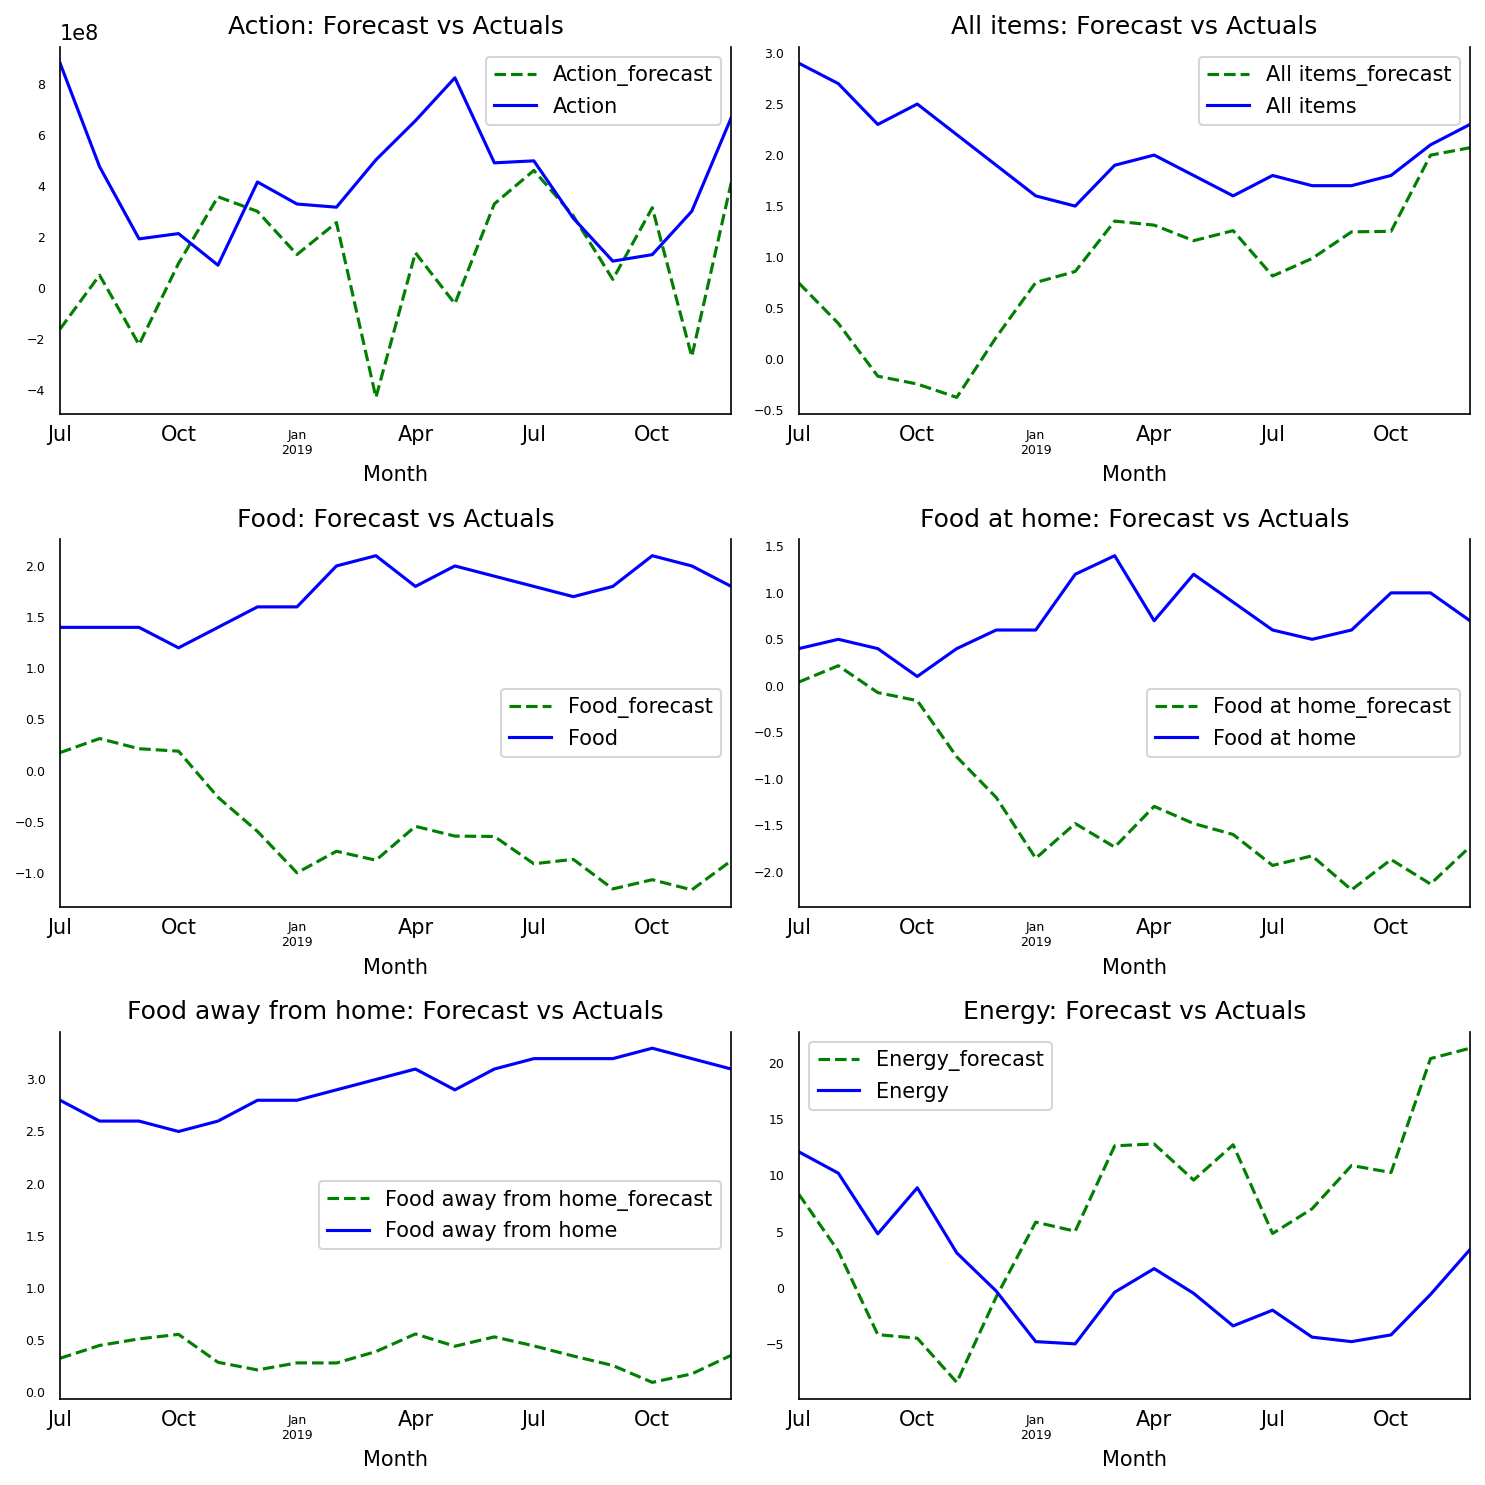

In [73]:
# plot predicted vs actual

fig, axes = plt.subplots(nrows=int(len(raw.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(raw.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(color='g', linestyle='dashed', legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][:].plot(color='b', legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [74]:
# function to display forecast accuracy for each variable

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})


cols = list(test.columns)

for col in cols:
    print(f'\nForecast Accuracy of: {col}')
    accuracy_prod = forecast_accuracy(df_results[col+'_forecast'].values, test[col])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: Action
mape :  0.9626
me :  -295938634.6725
mae :  347081837.2152
mpe :  -0.4713
rmse :  467643066.3694
corr :  -0.1491
minmax :  0.7928

Forecast Accuracy of: All items
mape :  0.5379
me :  -1.1502
mae :  1.1502
mpe :  -0.5379
rmse :  1.4475
corr :  -0.314
minmax :  0.5379

Forecast Accuracy of: Food
mape :  1.3069
me :  -2.3048
mae :  2.3048
mpe :  -1.3069
rmse :  2.4135
corr :  -0.8019
minmax :  1.3069

Forecast Accuracy of: Food at home
mape :  2.8132
me :  -1.9947
mae :  1.9947
mpe :  -2.8132
rmse :  2.2272
corr :  -0.5691
minmax :  2.8132

Forecast Accuracy of: Food away from home
mape :  0.8763
me :  -2.5819
mae :  2.5819
mpe :  -0.8763
rmse :  2.601
corr :  -0.3431
minmax :  0.8763

Forecast Accuracy of: Energy
mape :  7.2826
me :  6.2895
mae :  11.3053
mpe :  -5.7781
rmse :  12.2914
corr :  -0.2856
minmax :  1.2301

Forecast Accuracy of: Electricity
mape :  inf
me :  -0.7411
mae :  0.9252
mpe :  -inf
rmse :  1.1599
corr :  0.1429
minmax :  inf


<ipython-input-74-e7f3864de129>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-74-e7f3864de129>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-74-e7f3864de129>:15: RuntimeWarning: divide by zero encountered in true_divide
  minmax = 1 - np.mean(mins/maxs)             # minmax


### Diebold-Mariano Test

In [75]:
# via John Tsang, Github: johntwk
# Diebold-Mariano Test

def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [76]:
dm_test(actual_action, predict_action_group, predict_action_alone)

dm_return(DM=-2.588064595431182, p_value=0.01914664154213415)

In [77]:
df_count = pd.read_pickle('econ_count_data.pkl')
df_count.head()

,Month,action,Comedy,Romance,Sci-Fi,Adult,Mystery,Documentary,Adventure,News,...,Energy,Electricity,Gasoline (all types),All items less food and energy,Furniture and bedding,Apparel,Used cars and trucks,Medical care,Sporting goods,Public transportation
0,2015-01-01,318,543,273,205,1.0,105,100,518,1.0,...,-19.6,2.5,-35.4,1.6,-2.2,-1.4,-4.0,2.6,-1.9,-1.8
1,2015-02-01,242,455,226,160,NaN,130,85,514,9.0,...,-18.8,3.2,-32.8,1.7,-1.5,-0.8,-2.9,2.3,-1.9,-1.9
2,2015-03-01,324,483,240,233,NaN,102,108,401,9.0,...,-18.3,0.9,-29.2,1.8,-0.7,-0.5,-1.3,2.5,-2.2,-3.3
3,2015-04-01,383,440,230,164,NaN,142,145,362,10.0,...,-19.4,3.8,-31.7,1.8,0.0,-0.8,-0.5,2.9,-2.2,-4.7
4,2015-05-01,372,483,217,204,NaN,154,137,341,2.0,...,-16.3,0.5,-25.0,1.7,-0.8,-1.5,-0.5,2.8,-2.0,-4.1


In [78]:
df_count_a = df_count[['Month', 'action',
       'All items', 'Food', 'Food at home', 'Food away from home', 'Energy',
       'Electricity', 'Gasoline (all types)', 'All items less food and energy',
       'Furniture and bedding', 'Apparel', 'Used cars and trucks',
       'Medical care', 'Sporting goods', 'Public transportation',
       'Average weekly earnings of all employees',
       '12-month percent change in average weekly earnings of all employees',
       'Real average weekly earnings of all employees, 1982-1984 dollars',
       '12-month percent change in real average weekly earnings of all employees']]

In [79]:
df_count_a.head()

,Month,action,All items,Food,Food at home,Food away from home,Energy,Electricity,Gasoline (all types),All items less food and energy,Furniture and bedding,Apparel,Used cars and trucks,Medical care,Sporting goods,Public transportation,Average weekly earnings of all employees,12-month percent change in average weekly earnings of all employees,"Real average weekly earnings of all employees, 1982-1984 dollars",12-month percent change in real average weekly earnings of all employees
0,2015-01-01,318,-0.1,3.2,3.3,3.1,-19.6,2.5,-35.4,1.6,-2.2,-1.4,-4.0,2.6,-1.9,-1.8,853.19,2.4,363.45,2.7
1,2015-02-01,242,0.0,3.0,2.9,3.1,-18.8,3.2,-32.8,1.7,-1.5,-0.8,-2.9,2.3,-1.9,-1.9,857.39,2.8,364.32,2.9
2,2015-03-01,324,-0.1,2.3,1.9,2.9,-18.3,0.9,-29.2,1.8,-0.7,-0.5,-1.3,2.5,-2.2,-3.3,856.98,2.2,363.16,2.2
3,2015-04-01,383,-0.2,2.0,1.3,2.9,-19.4,3.8,-31.7,1.8,0.0,-0.8,-0.5,2.9,-2.2,-4.7,858.71,2.3,363.52,2.4
4,2015-05-01,372,0.0,1.6,0.6,3.0,-16.3,0.5,-25.0,1.7,-0.8,-1.5,-0.5,2.8,-2.0,-4.1,861.12,2.3,363.34,2.3


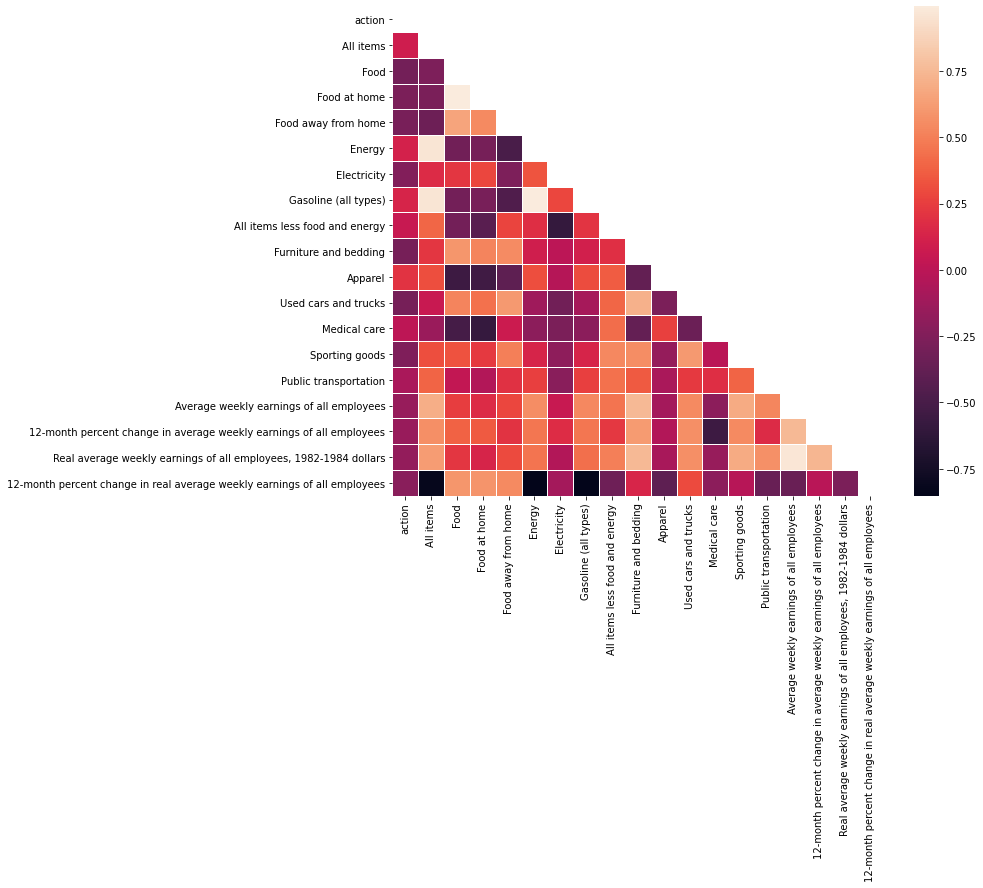

In [80]:
# Correlation matrix for action count versus econ data
corr = df_count_a.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask,
            linewidths=.5);

## Extra Visualizations and aggregates

In [81]:
## Extra visualizations

labor_v_gross = pd.read_pickle('../new_merged_data/monthly_labor_genre-daily-gross.pkl')
labor_v_count = pd.read_pickle('../new_merged_data/monthly_labor_genre-daily-count.pkl')

In [82]:
sns.set(rc={'figure.figsize':(10, 7)})
labor_v_gross_ts = labor_v_gross.set_index('Month')

In [ ]:
# select genres by gross
ax = sns.lineplot(data=labor_v_gross_ts[['action', 'Thriller', 'Animation','Horror']])
ax.set_title('Monthly Revenue by Genre')
ax.set(xlabel='Month', ylabel='Revenue')
plt.show()

In [ ]:
# Select genres by count
labor_v_count_ts = labor_v_count.set_index('Month')
ax = sns.lineplot(data=labor_v_count_ts[['action', 'Thriller', 'Animation','Horror']])
ax.set_title('Monthly Count by Genre')
ax.set(xlabel='Month', ylabel='Count')
plt.show()

In [ ]:
gross_v_count_action = pd.merge(labor_v_gross_ts['action'], labor_v_count_ts['action'], on='Month')
gross_v_count_action.rename(columns={'action_x':'gross', 'action_y':'count'}, inplace=True)
gross_v_count_action.head()

In [ ]:
plt.figure(figsize=(10,7))
plt.xlabel('Monthly numbers')
ax1 = gross_v_count_action.gross.plot(color='blue', grid=True, label='Revenue')
ax2 = gross_v_count_action['count'].plot(color='red', grid=True, secondary_y=True, label='Count')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
ax1.set_ylabel('Revenue')
ax2.set_ylabel('Count')
ax1.set_title('Monthly Revenue and Count for Action films')
plt.show()

In [ ]:
## Checking where the spike in action films comes from in summer 2018
movie = pd.read_pickle('clean-boxofficemojo-daily_gross.pkl')
mask = (movie['Date'] > '2018-03-01') & (movie['Date'] < '2018-08-01')
temp = movie.loc[mask].groupby('Movie').agg({'Daily':'sum', 'Action':'sum'})
maxRev = temp['Daily'].max()
print(temp.loc[temp['Daily']== maxRev])
top_gross_summer = temp.sort_values('Daily', ascending=False).head(10)
top_gross_summer

In [ ]:
top_movies = top_gross_summer.index.tolist()
top_total = movie.loc[movie['Movie'].isin(top_movies)]
top_total[['Movie', 'Action']].groupby('Movie').agg({'Action':'sum'})